In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# 1. Random Data Generator

## a. Univariate gaussian data generator

Since a $N(\mu,\sigma^2)$ can be generated as $X = \mu + \sigma Z$  where Z is standard normal<br>
The Box-Muller method uses two independent random numbers U and V distributed uniformly in (0,1). Then the two random variables X and Y.<br>
$X = \sqrt{-2\ln U}\cos(2\pi V)$ 

In [2]:
def univariate_gaussian_data_generator(m, s):    
    # Box-Muller method
    U = np.random.uniform(0,1)
    V = np.random.uniform(0,1)
    Z = np.sqrt(-2*np.log(U))*math.cos(2*math.pi*V)
    
    data = m + s**0.5*Z # output
    
    return data

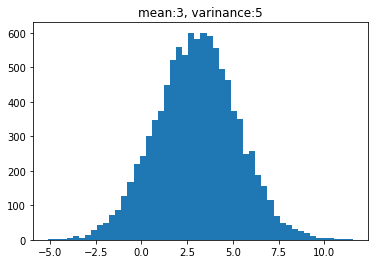

In [3]:
m = 3
s = 5
n_samples = 10000
data = []

for i in range (n_samples):
    data.append(univariate_gaussian_data_generator(m, s))

plt.hist(data, 50)
plt.title('mean:{}, varinance:{}'.format(m,s))
plt.show()

## b. Polynomial basis linear model data generator

$y = W^T \phi(x) + e$ <br>
$W$ is a $n \times 1$ vector<br>
$e ～　N(0,a)$<br>
$-1.0 < x < 1.0$

In [4]:
def poly_basis_linear_model_gen(n, a, w):
    y = 0
    x = np.random.uniform(-1.0,1.0)
    for i in range(n):
        y += w[i]*x**i
    e = univariate_gaussian_data_generator(0, a)
    y = y + e
    #print('data from poly_gen ({}, {})'.format(x, y))
    return x, y

In [5]:
n = 2
a = 10
w = (2, 5)
poly_basis_linear_model_gen(n, a, w)

(0.6086814079304632, 1.6256209787083473)

# 2. Sequential Estimator

HINT: Welford's online algorithm<br>
It is often to be able to compute the variance in a single pass, inspecting each value $x_{i}$ . <br>
The following formula cna be used to update the mean and .(estimated) variance of the sequence, for an additional element $x_{n}$. Here $\bar{x}_{n}$ denotes the sample mean of the first $n$ samples $(x_{1},....,x{n})$,<br>
$\sigma_{n}^2 = \frac{1}{n}\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ thier biased sample vairance.<br>
$s_{n}^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ their unbiased sample variance.<br>
$\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ here denoted $M_{2,n}$<br>
$M_{2,n} = M_{2,n-1} + (x_{n} - \bar{x}_{n-1})(x_{n}-\bar{x}_{n})$<br>
$\sigma^2_{n} = \frac{M_{2,n}}{n}$<br>
$s^2_{n} = \frac{M_{2,n}}{n-1}$<br>
It is also common to denote $M_{k} = \bar{x}_{k} $ and $S_{k} = M_{2,k}$

In [6]:
# For a new value newValue, compute the new count, new mean, the new M2.
# mean accumulates the mean of the entire dataset
# M2 aggregates the squared distance from the mean
# count aggregates the number of samples seen so far
def update(existingAggregate, newValue):
    (count, mean, M2) = existingAggregate
    count += 1
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2
    return (count, mean, M2)

# Retrieve the mean, variance and sample variance from an aggregate
def finalize(existingAggregate):
    (count, mean, M2) = existingAggregate
    if count == 0:
        (mean, variance, sampleVariance) = (999, 0, 0)
    else:
        (mean, variance, sampleVariance) = (mean, M2 / count, M2 / (count - 1))
        #print('count: {}'.format(count))
        print('Mean={} Varaince={} '.format(mean, variance))
        print()
    return (mean, variance, sampleVariance)

def sequential_estimator(data):
    count = 0
    mean = 0
    M2 = 0
    new_mean = 0
    new_M2 = 0
    sample_variance = 0
    for i in range(len(data)):
        existingAggregate = (count, mean, M2)
        newAggregate = (count, new_mean, new_M2)
        new_data = data[i]
        print('Add data point: {}'.format(new_data))
        
        newAggregate = update(existingAggregate, new_data)
        new_mean, new_variance, sample_variance = finalize(newAggregate)
        
        count += 1

In [7]:
m = 3.0
s = 5.0
data = []
for i in range(n_samples):
    data.append(univariate_gaussian_data_generator(m, s))

estimation = sequential_estimator(data)

Add data point: 3.1640362623656144
Mean=3.1640362623656144 Varaince=0.0 

Add data point: 2.396156660803701
Mean=1.1980783304018505 Varaince=1.4353916857784856 

Add data point: 5.101411035894259
Mean=1.7004703452980863 Varaince=5.783198790476386 

Add data point: 5.077005344340215
Mean=1.2692513360850537 Varaince=4.832996862461082 

Add data point: 9.800622145448664
Mean=1.9601244290897326 Varaince=15.3683511100574 

Add data point: 2.811677362154188
Mean=0.46861289369236464 Varaince=1.0979902206736571 

Add data point: 3.053864806502441
Mean=0.43626640092892016 Varaince=1.14197023547684 

Add data point: 1.2697759507197097
Mean=0.15872199383996372 Varaince=0.17634869929973435 

Add data point: 2.2712286786457057
Mean=0.2523587420717451 Varaince=0.5094794776002685 

Add data point: 5.019885287504282
Mean=0.5019885287504282 Varaince=2.267932346973175 

Add data point: -0.6274559844120473
Mean=-0.05704145312836794 Varaince=0.03253727374995796 

Add data point: 1.051698117535923
Mean=0.0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars




Add data point: 1.3550655028176282
Mean=0.0009819315237808899 Varaince=0.0013296173444872369 

Add data point: 2.475399707097777
Mean=0.001792469013104835 Varaince=0.004433864324858609 

Add data point: 3.3036606180954857
Mean=0.0023904924877680795 Varaince=0.007891661435358433 

Add data point: 3.706932916929858
Mean=0.0026803564113737225 Varaince=0.009928717099933248 

Add data point: 4.398548542789607
Mean=0.0031781420106861322 Varaince=0.013969111323241828 

Add data point: -0.15273126637949686
Mean=-0.00011027528258447426 Varaince=1.6830322921534544e-05 

Add data point: 5.478243730470551
Mean=0.003952556804091306 Varaince=0.021637446826052346 

Add data point: 3.438817177943855
Mean=0.0024793202436509407 Varaince=0.008519782014620222 

Add data point: 1.6252133920063134
Mean=0.0011709030201774591 Varaince=0.0019015962552503848 

Add data point: 0.9561751502928644
Mean=0.0006883910369279081 Varaince=0.0006577485209750806 

Add data point: 2.7200518908930937
Mean=0.00195687186395

Mean=0.0009663305765428009 Varaince=0.0025940819076227632 

Add data point: 2.0882973649486867
Mean=0.0007511861024995276 Varaince=0.0015681356778752492 

Add data point: 3.9132868654357464
Mean=0.0014071509764242167 Varaince=0.005504605359855521 

Add data point: 2.2397425376325506
Mean=0.0008050835864962439 Varaince=0.001802531795444167 

Add data point: 1.0695404440724454
Mean=0.000384312053206053 Varaince=0.00041088958829415563 

Add data point: 3.061855786057342
Mean=0.0010998045208539303 Varaince=0.0033662332657245385 

Add data point: 0.7201363314186393
Mean=0.00025857677968353296 Varaince=0.00018614367156035366 

Add data point: 4.797775209775993
Mean=0.0017221016546216771 Varaince=0.008259290993149251 

Add data point: 8.911710845716108
Mean=0.003197599872879838 Varaince=0.028485860822456657 

Add data point: 3.2639189038509517
Mean=0.0011707026197456786 Varaince=0.0038197078667518733 

Add data point: 0.45308596119803024
Mean=0.00016245462932880253 Varaince=7.357952037391985e

Add data point: 3.373817744500521
Mean=0.0008073265720269253 Varaince=0.002723120938117318 

Add data point: 5.508008506707482
Mean=0.0013177053843797806 Varaince=0.0072561961190180605 

Add data point: 2.6719197325890476
Mean=0.0006390623612985046 Varaince=0.0017071149328067973 

Add data point: -1.4487516937964031
Mean=-0.0003464255604486856 Varaince=0.0005017646068054693 

Add data point: 4.590091035777791
Mean=0.0010973203528036794 Varaince=0.0050355962028240135 

Add data point: 6.093341417411584
Mean=0.0014563435510065927 Varaince=0.008871877540790173 

Add data point: 2.4812653166731202
Mean=0.000592894938273147 Varaince=0.0014707781223603804 

Add data point: -3.750816447673997
Mean=-0.0008960383295924503 Varaince=0.0033600724196935976 

Add data point: 6.323118292346145
Mean=0.0015101787180191414 Varaince=0.009546758036858324 

Add data point: 1.0693241541238945
Mean=0.0002553305048051324 Varaince=0.0002729658824060911 

Add data point: 3.266895808633493
Mean=0.000779874864796

Add data point: 2.314033253090207
Mean=0.00041477563238756174 Varaince=0.0009596325670911147 

Add data point: 5.656015547234794
Mean=0.0010136228579273826 Varaince=0.005732039212171728 

Add data point: -0.32200446565968965
Mean=-5.769655360324129e-05 Varaince=1.8575219021119665e-05 

Add data point: 4.999381142703554
Mean=0.0008956254286462834 Varaince=0.004476770733991579 

Add data point: 4.208703202772334
Mean=0.0007538425940842439 Varaince=0.0031721314614519065 

Add data point: 5.618699463638251
Mean=0.001006214087327767 Varaince=0.005652602085984239 

Add data point: 1.6166981767170128
Mean=0.0002894714730021509 Varaince=0.0004679042088804833 

Add data point: 1.6618297933626056
Mean=0.0002974990679131052 Varaince=0.0004943043088601941 

Add data point: 3.369711507989971
Mean=0.0006031343311240328 Varaince=0.0020320249254311066 

Add data point: -0.716378852913973
Mean=-0.0001281995083954855 Varaince=9.182298165454029e-05 

Add data point: 2.426373144510363
Mean=0.0004341336812


Add data point: 4.1734065542937255
Mean=0.0005979949210909479 Varaince=0.00249531832518967 

Add data point: 4.60554895574189
Mean=0.000659820767298265 Varaince=0.003038401482362379 

Add data point: 8.021112299275185
Mean=0.001148991877850621 Varaince=0.00921487270085954 

Add data point: 2.487320989016432
Mean=0.00035624763520716586 Varaince=0.0008859753079606621 

Add data point: 0.4932312886121162
Mean=7.06331503096257e-05 Varaince=3.483349070402731e-05 

Add data point: 4.110871743113008
Mean=0.0005886127925419541 Varaince=0.0024193652314760147 

Add data point: 4.5328096631478685
Mean=0.0006489348121901028 Varaince=0.002941076871057873 

Add data point: 6.0172616880792
Mean=0.0008613314755338105 Varaince=0.00518211499655558 

Add data point: 5.142049945959677
Mean=0.0007359453193015138 Varaince=0.003783725973830624 

Add data point: 2.289733516189584
Mean=0.00032766650203056437 Varaince=0.0007501616064954328 

Add data point: 6.337381126287755
Mean=0.000906765077448527 Varaince=

Add data point: 1.7922471608415853
Mean=0.0002089840439414162 Varaince=0.0003745073850845742 

Add data point: 5.191891842464745
Mean=0.0006053272522402641 Varaince=0.0031424272018455214 

Add data point: 6.048245586007003
Mean=0.0007050880841696203 Varaince=0.004264048743618602 

Add data point: 0.9576671315315015
Mean=0.00011162922619553578 Varaince=0.00010689117976161888 

Add data point: 1.1578245123876547
Mean=0.000134944581863363 Varaince=0.00015622393465512994 

Add data point: 5.3116725050214395
Mean=0.000619003904559077 Varaince=0.003287562854513505 

Add data point: 2.6538577184845487
Mean=0.00030923534356613246 Varaince=0.0008205709768534913 

Add data point: 3.5018369631618254
Mean=0.00040799684995477403 Varaince=0.001428571988595644 

Add data point: 6.297409294945929
Mean=0.0007336217724773916 Varaince=0.004619378368068781 

Add data point: 6.604092346988229
Mean=0.000769259446358559 Varaince=0.005079668662449149 

Add data point: 5.206542226028706
Mean=0.0006063990479884

Mean=0.0004481026646527209 Varaince=0.0020033416727331045 

Add data point: 1.0418596392680664
Mean=0.00010440521487805055 Varaince=0.00010876467906165697 

Add data point: 8.447165006918716
Mean=0.0008464093193305327 Varaince=0.0071490427750429165 

Add data point: 4.5954907670430005
Mean=0.00046042388208025254 Varaince=0.002115661708874706 

Add data point: 2.145436773822368
Mean=0.00021493055237651454 Varaince=0.00046107371574418397 

Add data point: 1.837643182855426
Mean=0.0001840772496098794 Varaince=0.00033823441843054756 

Add data point: 6.0144887480001366
Mean=0.0006024127351762957 Varaince=0.003622841716266314 

Add data point: 1.9732568163293125
Mean=0.00019762211480513895 Varaince=0.00038992013059639436 

Add data point: 1.3558727939871178
Mean=0.0001357773677135107 Varaince=0.00018407840342835082 

Add data point: 5.942713622678528
Mean=0.0005950449206647169 Varaince=0.003535827477682268 

Add data point: 1.278671176697145
Mean=0.00012802074256078745 Varaince=0.0001636800

# 3. Baysian Linear regression

## Input 

The precision for initial prior $w ～ N(0,b^{-1}I)$ <br>
All other required inputs for the polynomial basis linear model generator(1.b)<br>

In [8]:
b = 100
n = 4
a = 1
w = (1,2,3,4)
data = []
point_x=[]
point_y=[]

mean_record = []
variance_record = []

# N(0,b^-1I)
mean = np.zeros((n,1))
variance = (1/b)*np.identity(n) 

for i in range(n_samples):
    data.append(poly_basis_linear_model_gen(n, a, w))

### Deriving posterior probability$P(W|D)$for Bayesian regression 

#### -Update Note

$\bigwedge_{new} = ax^{T}x + b$, new precision matrix $\bigwedge_{new}$<br>
$\mu_{new} = a\bigwedge_{new}^{-1}x^{T}Y$<br>
$\mu_{new} = \bigwedge^{-1}(aX^{T}y+Sm)$ (modified)<br>
$a = scalar, which\ is\ our\ noise\ variace$<br>
$x = design \ matrix = \begin{bmatrix} x_{0} \\ x_{1} \\ x_{2} \end{bmatrix}$<br>
$b = prior\ precision\ matrix\ = bI = \begin{bmatrix} b&0&0 \\ 0&b&0 \\ 0&0&b \end{bmatrix}$<br>
$Y = scalar\ data\ Y_{i}$<br>
$\bigwedge_{new} = matrix\ 3 \times 3$<br>
$\mu = matrix\ 3 \times 1$

#### -Predict Note

$\mu_{new} = \mu^{T}x$<br>
$\bigwedge_{new}^{-1} = \sigma_{new}^{2} = \frac{1}{a} + x^{T}\bigwedge x$

In [9]:
def to_X(x_value):
    X = np.zeros((1,n))
    for i in range(n):
        X[0,i] = x_value**i
    return X

def update(a, X, Y, mean, variance):
    S = np.linalg.pinv(variance)
    #covariance_new = a*X.T@X + variance
    variance_new=np.linalg.pinv(a*X.T@X+S)
    mean_new = variance_new@(a*X.T*Y + S@mean)
    return variance_new, mean_new

def baysian_linear_regression(data, mean, variance):
    
    for i in range(len(data)):
    
        # Update
        point = data[i]
        print('Add data point {}:'.format(point))
        X = to_X(point[0])
        Y = point[1]
        variance_new, mean_new = update(a, X, Y, mean, variance)
        print('Posterior mean:')
        print(mean_new)
        print()
        print('Posterior variance:')
        print(variance_new)
        print('---------------------------------------------------------------------')
        
        # Predict
        mean_pred = (X@mean_new).item()
        variance_pred = ((1/a) + X@variance_new@X.T).item()
        print('Predictive distribution ~ N({}, {})'.format(mean_pred, variance_pred))
        print()
        
        # Record 
        mean_record.append(mean_new)
        variance_record.append(variance_new)
        
        # Save
        point_x.append(point[0])
        point_y.append(point[1])
        
        # update
        mean = mean_new
        variance = variance_new
    
    return mean_record, variance_record, point_x, point_y

def visualize(x, mean, variance, w):
    gt_mean = np.zeros(500)
    gt_variance = np.zeros(500)
    _mean_predict = np.zeros((n_samples,500))
    _variance_predict = np.zeros((n_samples,500))
    for j in range(n_samples):
        for i in range(len(x)):
            X = to_X(x[i])
            _mean_predict[j][i]=(X@mean[j]).item()
            _variance_predict[j][i]=((a)+X@variance[j]@X.T).item()
    
    for i in range(len(x)):
        X = to_X(x[i])
        gt_mean[i] = (X@w).item()
        gt_variance[i] = ((a)+X@np.zeros((n,n))@X.T).item()
        
    plt.subplot(2,2,1)    
    plt.plot(point_x[:0],point_y[:0],'bo')
    plt.plot(x,gt_mean,'k-')
    plt.plot(x,gt_mean+gt_variance,'r-')
    plt.plot(x,gt_mean-gt_variance,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('Ground Truth')
    

    mean_predict = _mean_predict[n_samples-1]
    variance_predict = _variance_predict[n_samples-1]
    plt.subplot(2,2,2)    
    plt.plot(point_x[:n_samples],point_y[:n_samples],'bo')
    plt.plot(x,mean_predict,'k-')
    plt.plot(x,mean_predict+variance_predict,'r-')
    plt.plot(x,mean_predict-variance_predict,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('Predict Result')
    
    mean_predict = _mean_predict[9]
    variance_predict = _variance_predict[9]
    plt.subplot(2,2,3)    
    plt.plot(point_x[:10],point_y[:10],'bo')
    plt.plot(x,_mean_predict[9],'k-')
    plt.plot(x,_mean_predict[9]+_variance_predict[9],'r-')
    plt.plot(x,_mean_predict[9]-_variance_predict[9],'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('After 10 incomes')
    
    mean_predict = _mean_predict[49]
    variance_predict = _variance_predict[49]
    plt.subplot(2,2,4)    
    plt.plot(point_x[:50],point_y[:50],'bo')
    plt.plot(x,_mean_predict[49],'k-')
    plt.plot(x,_mean_predict[49]+_variance_predict[49],'r-')
    plt.plot(x,_mean_predict[49]-_variance_predict[49],'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('After 50 incomes')
    
    plt.tight_layout()
    
    
    

In [10]:
mean_record, variance_record, point_x, point_y =  baysian_linear_regression(data, mean, variance)

Add data point (-0.7657864324661936, -0.39361891374659874):
Posterior mean:
[[-0.00385402]
 [ 0.00295136]
 [-0.00226011]
 [ 0.00173076]]

Posterior variance:
[[ 9.90208749e-03  7.49800683e-05 -5.74187190e-05  4.39704760e-05]
 [ 7.49800683e-05  9.94258128e-03  4.39704760e-05 -3.36719939e-05]
 [-5.74187190e-05  4.39704760e-05  9.96632801e-03  2.57855561e-05]
 [ 4.39704760e-05 -3.36719939e-05  2.57855561e-05  9.98025377e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.008216773076993315, 1.0208749447499443)

Add data point (-0.14996136529733195, 1.1008767571150435):
Posterior mean:
[[ 0.0069667 ]
 [ 0.00140319]
 [-0.00208501]
 [ 0.0017482 ]]

Posterior variance:
[[ 9.80526558e-03  8.88328059e-05 -5.89854618e-05  4.38143913e-05]
 [ 8.88328059e-05  9.94059931e-03  4.41946368e-05 -3.36496622e-05]
 [-5.89854618e-05  4.41946368e-05  9.96630265e-03  2.57830304e-05]
 [ 4.38143913e-05 -3.36496622e-05  2.57830304e-05  9.98025352e-03]]
-----

Posterior mean:
[[1.16477702]
 [1.50158741]
 [0.82761739]
 [1.08196278]]

Posterior variance:
[[ 3.98356064e-03 -1.21854082e-04 -1.78473947e-03 -3.83181857e-05]
 [-1.21854082e-04  6.64454291e-03 -8.26106971e-05 -1.96924880e-03]
 [-1.78473947e-03 -8.26106971e-05  8.06524552e-03 -1.19288854e-04]
 [-3.83181857e-05 -1.96924880e-03 -1.19288854e-04  8.45983559e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.1812722378526956, 1.0039812660352063)

Add data point (-0.9294467909044342, -2.7537172665521137):
Posterior mean:
[[1.15874612]
 [1.5127541 ]
 [0.81512748]
 [1.09386609]]

Posterior variance:
[[ 3.97697802e-03 -1.09665842e-04 -1.79837198e-03 -2.53259337e-05]
 [-1.09665842e-04  6.62197540e-03 -5.73690056e-05 -1.99330500e-03]
 [-1.79837198e-03 -5.73690056e-05  8.03701276e-03 -9.23820629e-05]
 [-2.53259337e-05 -1.99330500e-03 -9.23820629e-05  8.43419249e-03]]
---------------------------------------------------------------------
Predic

 [-8.76955086e-06 -2.27377728e-03 -8.93378865e-05  8.13608893e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.25866261781675093, 1.0094511170841252)

Add data point (-0.011952594082964563, 0.6707335334160416):
Posterior mean:
[[1.24503403]
 [1.71838998]
 [0.944165  ]
 [1.27374783]]

Posterior variance:
[[ 3.36885101e-03 -8.37356626e-05 -1.83787444e-03 -8.83148839e-06]
 [-8.37356626e-05  6.11951585e-03 -3.85627469e-05 -2.27377440e-03]
 [-1.83787444e-03 -3.85627469e-05  7.62682416e-03 -8.93041325e-05]
 [-8.83148839e-06 -2.27377440e-03 -8.93041325e-05  8.13608860e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.2246275233272599, 1.0033712020831982)

Add data point (-0.017801246547596294, 0.3613129361281979):
Posterior mean:
[[1.24216786]
 [1.71855386]
 [0.94572558]
 [1.27372098]]

Posterior variance:
[[ 3.35753390e-03 -8.30885932e-05 -1.83171249e-03 -8.93751524e-06]
 [-8.308

---------------------------------------------------------------------
Predictive distribution ~ N(1.802589668978884, 1.0026465652640644)

Add data point (-0.7289742041429554, -0.5016547714027962):
Posterior mean:
[[1.31267189]
 [1.9385936 ]
 [1.06388005]
 [1.42326342]]

Posterior variance:
[[ 2.56919323e-03 -4.03719463e-06 -1.87769144e-03  3.65310748e-05]
 [-4.03719463e-06  5.23682106e-03  8.62471794e-05 -2.64271657e-03]
 [-1.87769144e-03  8.62471794e-05  6.95801118e-03  4.86632347e-05]
 [ 3.65310748e-05 -2.64271657e-03  4.86632347e-05  7.71719586e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.08650624913252491, 1.004877544265504)

Add data point (0.7261684000491908, 6.21077390809954):
Posterior mean:
[[1.31644418]
 [1.94531282]
 [1.06832271]
 [1.42586881]]

Posterior variance:
[[ 2.56667751e-03 -8.51819521e-06 -1.88065421e-03  3.47935557e-05]
 [-8.51819521e-06  5.22883949e-03  8.09698809e-05 -2.64581145e-03]
 [-1.88065421e-03

Posterior mean:
[[1.35878618]
 [2.08916021]
 [1.17304417]
 [1.5655705 ]]

Posterior variance:
[[ 2.34169212e-03 -7.51754928e-05 -1.88442157e-03  3.38266300e-05]
 [-7.51754928e-05  4.92208803e-03  5.75307394e-05 -2.78857388e-03]
 [-1.88442157e-03  5.75307394e-05  6.62617722e-03  3.98159068e-05]
 [ 3.38266300e-05 -2.78857388e-03  3.98159068e-05  7.49920209e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.2932660038802216, 1.0050925040125356)

Add data point (0.682749018376722, 4.267281992602908):
Posterior mean:
[[1.35940561]
 [2.09021589]
 [1.17359114]
 [1.56580351]]

Posterior variance:
[[ 2.33967573e-03 -7.86119746e-05 -1.88620209e-03  3.30681104e-05]
 [-7.86119746e-05  4.91623132e-03  5.44962324e-05 -2.78986661e-03]
 [-1.88620209e-03  5.44962324e-05  6.62460497e-03  3.91461134e-05]
 [ 3.30681104e-05 -2.78986661e-03  3.91461134e-05  7.49891675e-03]]
---------------------------------------------------------------------
Predictiv

Posterior mean:
[[1.36082296]
 [2.20874282]
 [1.22749024]
 [1.63755706]]

Posterior variance:
[[ 1.95891612e-03 -6.76273192e-05 -1.78809765e-03  3.91066180e-05]
 [-6.76273192e-05  4.48988730e-03  8.49186280e-05 -2.91489538e-03]
 [-1.78809765e-03  8.49186280e-05  6.18080978e-03  9.78012436e-05]
 [ 3.91066180e-05 -2.91489538e-03  9.78012436e-05  7.30686412e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.2775105675452028, 1.0020360267591515)

Add data point (-0.4509138246871913, 1.472258364247214):
Posterior mean:
[[1.36245444]
 [2.20692489]
 [1.2269083 ]
 [1.63826451]]

Posterior variance:
[[ 1.95629030e-03 -6.47013979e-05 -1.78716104e-03  3.79679954e-05]
 [-6.47013979e-05  4.48662698e-03  8.38749673e-05 -2.91362663e-03]
 [-1.78716104e-03  8.38749673e-05  6.18047570e-03  9.82073843e-05]
 [ 3.79679954e-05 -2.91362663e-03  9.82073843e-05  7.30637038e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.37297457]
 [2.26925838]
 [1.28707008]
 [1.68734509]]

Posterior variance:
[[ 1.82135712e-03 -5.13158126e-05 -1.74154445e-03  2.69680856e-05]
 [-5.13158126e-05  4.32072395e-03  5.88627389e-05 -2.95182418e-03]
 [-1.74154445e-03  5.88627389e-05  5.98357362e-03  8.09732148e-05]
 [ 2.69680856e-05 -2.95182418e-03  8.09732148e-05  7.20769721e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.875302560987513, 1.001834883044564)

Add data point (0.24303846354197667, 3.3264932622911054):
Posterior mean:
[[1.37519179]
 [2.27050561]
 [1.28528654]
 [1.68658863]]

Posterior variance:
[[ 1.81845069e-03 -5.29507432e-05 -1.73920650e-03  2.79596919e-05]
 [-5.29507432e-05  4.31980427e-03  6.01778858e-05 -2.95126638e-03]
 [-1.73920650e-03  6.01778858e-05  5.98169296e-03  8.01755613e-05]
 [ 2.79596919e-05 -2.95126638e-03  8.01755613e-05  7.20735890e-03]]
---------------------------------------------------------------------
Predictiv

Posterior mean:
[[1.37008168]
 [2.35464438]
 [1.39251955]
 [1.79407175]]

Posterior variance:
[[ 1.63698113e-03 -5.38206158e-05 -1.67795960e-03  2.01419111e-05]
 [-5.38206158e-05  4.06072457e-03  2.40516859e-05 -3.00506236e-03]
 [-1.67795960e-03  2.40516859e-05  5.65950147e-03  3.92851494e-05]
 [ 2.01419111e-05 -3.00506236e-03  3.92851494e-05  7.03443232e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.379962826771454, 1.0016888427700508)

Add data point (0.8984252486259092, 6.994039639589847):
Posterior mean:
[[1.37034976]
 [2.35618996]
 [1.39568724]
 [1.79671473]]

Posterior variance:
[[ 1.63691956e-03 -5.41755897e-05 -1.67868712e-03  1.95348996e-05]
 [-5.41755897e-05  4.05867802e-03  1.98572741e-05 -3.00856198e-03]
 [-1.67868712e-03  1.98572741e-05  5.65090499e-03  3.21126339e-05]
 [ 1.95348996e-05 -3.00856198e-03  3.21126339e-05  7.02844790e-03]]
---------------------------------------------------------------------
Predictive

Posterior mean:
[[1.348572  ]
 [2.40052366]
 [1.46504771]
 [1.85570547]]

Posterior variance:
[[ 1.53682451e-03 -4.51783623e-05 -1.63731334e-03  1.16029436e-05]
 [-4.51783623e-05  3.90632182e-03  6.51624826e-06 -3.04354338e-03]
 [-1.63731334e-03  6.51624826e-06  5.40752956e-03  4.89232832e-05]
 [ 1.16029436e-05 -3.04354338e-03  4.89232832e-05  6.87519111e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.4909256689678512, 1.001686592446509)

Add data point (0.7501764968682223, 4.6820452414213065):
Posterior mean:
[[1.348528  ]
 [2.4004033 ]
 [1.46494031]
 [1.85565606]]

Posterior variance:
[[ 1.53648162e-03 -4.61162779e-05 -1.63815032e-03  1.12179231e-05]
 [-4.61162779e-05  3.90375632e-03  4.22684090e-06 -3.04459653e-03]
 [-1.63815032e-03  4.22684089e-06  5.40548654e-03  4.79834664e-05]
 [ 1.12179231e-05 -3.04459653e-03  4.79834664e-05  6.87475878e-03]]
---------------------------------------------------------------------
Predictiv

Posterior mean:
[[1.34566668]
 [2.44718482]
 [1.53935081]
 [1.93805338]]

Posterior variance:
[[ 1.38170447e-03 -4.69417400e-05 -1.54832684e-03  1.82749399e-05]
 [-4.69417400e-05  3.69780330e-03  2.74457338e-05 -3.07110503e-03]
 [-1.54832684e-03  2.74457338e-05  5.05055756e-03  7.51720310e-05]
 [ 1.82749399e-05 -3.07110503e-03  7.51720310e-05  6.66935765e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.0582345215968652, 1.0047976522570505)

Add data point (-0.44133066319497494, 1.3849605714744946):
Posterior mean:
[[1.34674899]
 [2.44579702]
 [1.53877662]
 [1.9388558 ]]

Posterior variance:
[[ 1.38049791e-03 -4.53946196e-05 -1.54768673e-03  1.73804071e-05]
 [-4.53946196e-05  3.69581949e-03  2.66249541e-05 -3.06995800e-03]
 [-1.54768673e-03  2.66249541e-05  5.05021797e-03  7.56465993e-05]
 [ 1.73804071e-05 -3.06995800e-03  7.56465993e-05  6.66869445e-03]]
---------------------------------------------------------------------
Predi

---------------------------------------------------------------------
Predictive distribution ~ N(0.9934631476864295, 1.0013420862888787)

Add data point (0.25581042030088996, 1.1309629556029448):
Posterior mean:
[[1.33840575]
 [2.46744765]
 [1.56106911]
 [1.97167199]]

Posterior variance:
[[ 1.31573052e-03 -3.86942079e-05 -1.49976857e-03  1.56344758e-05]
 [-3.86942079e-05  3.62361779e-03  3.44852164e-05 -3.07364314e-03]
 [-1.49976857e-03  3.44852164e-05  4.90581658e-03  9.72887744e-05]
 [ 1.56344758e-05 -3.07364314e-03  9.72887744e-05  6.59067958e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.1047650615061535, 1.0013351946935958)

Add data point (0.786254883762572, 7.728176034722483):
Posterior mean:
[[1.33932716]
 [2.47081768]
 [1.56511845]
 [1.97384499]]

Posterior variance:
[[ 1.31559712e-03 -3.91821096e-05 -1.50035482e-03  1.53198746e-05]
 [-3.91821096e-05  3.62183330e-03  3.23410172e-05 -3.07479378e-03]
 [-1.50035482e-03 

Posterior mean:
[[1.32506675]
 [2.52804332]
 [1.64338821]
 [2.05579748]]

Posterior variance:
[[ 1.22167460e-03 -2.48744582e-05 -1.44337715e-03  6.07490865e-06]
 [-2.48744582e-05  3.47003702e-03  1.59906223e-05 -3.09701483e-03]
 [-1.44337715e-03  1.59906223e-05  4.62470483e-03  8.89952595e-05]
 [ 6.07490865e-06 -3.09701483e-03  8.89952595e-05  6.44299937e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.14372895658730533, 1.0016257891922888)

Add data point (-0.4707082939949985, -0.6971744887101093):
Posterior mean:
[[1.32417147]
 [2.52934926]
 [1.64381529]
 [2.05500156]]

Posterior variance:
[[ 1.22084226e-03 -2.36603291e-05 -1.44298009e-03  5.33494565e-06]
 [-2.36603291e-05  3.46826598e-03  1.54114406e-05 -3.09593545e-03]
 [-1.44298009e-03  1.54114406e-05  4.62451542e-03  8.93482476e-05]
 [ 5.33494565e-06 -3.09593545e-03  8.93482476e-05  6.44234153e-03]]
---------------------------------------------------------------------
Pred

Posterior mean:
[[1.32622201]
 [2.53610592]
 [1.66147758]
 [2.07593617]]

Posterior variance:
[[ 1.16967108e-03 -2.59063550e-05 -1.39877759e-03  5.36078630e-06]
 [-2.59063550e-05  3.41005777e-03  2.24218644e-05 -3.09947989e-03]
 [-1.39877759e-03  2.24218644e-05  4.47418054e-03  1.22285670e-04]
 [ 5.36078630e-06 -3.09947989e-03  1.22285670e-04  6.35263273e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.25762191573898, 1.0016149359686366)

Add data point (-0.030658917372826222, 1.4659563119130121):
Posterior mean:
[[1.32647423]
 [2.5360778 ]
 [1.66117658]
 [2.07595781]]

Posterior variance:
[[ 1.16830577e-03 -2.57541409e-05 -1.39714823e-03  5.24363517e-06]
 [-2.57541409e-05  3.41004080e-03  2.22402122e-05 -3.09946683e-03]
 [-1.39714823e-03  2.22402122e-05  4.47223606e-03  1.22425478e-04]
 [ 5.24363517e-06 -3.09946683e-03  1.22425478e-04  6.35262268e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.32260746]
 [2.54555105]
 [1.75251231]
 [2.13286257]]

Posterior variance:
[[ 1.08824195e-03 -1.71383984e-05 -1.34161416e-03  1.17371862e-06]
 [-1.71383984e-05  3.26943501e-03  9.63892390e-07 -3.07570425e-03]
 [-1.34161416e-03  9.63892389e-07  4.26607980e-03  7.01493291e-05]
 [ 1.17371862e-06 -3.07570425e-03  7.01493291e-05  6.21902805e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.27378629433808227, 1.001210220066384)

Add data point (-0.4575795075969804, 1.4848580656903727):
Posterior mean:
[[1.32355543]
 [2.54413411]
 [1.75198248]
 [2.13382489]]

Posterior variance:
[[ 1.08757841e-03 -1.61466020e-05 -1.34124330e-03  5.00131082e-07]
 [-1.61466020e-05  3.26795256e-03  4.09567415e-07 -3.07469743e-03]
 [-1.34124330e-03  4.09567415e-07  4.26587253e-03  7.05258039e-05]
 [ 5.00131083e-07 -3.07469743e-03  7.05258039e-05  6.21834426e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.32118175]
 [2.56388921]
 [1.77375034]
 [2.15353253]]

Posterior variance:
[[ 1.05047198e-03 -1.39208943e-05 -1.31179688e-03 -1.70658188e-06]
 [-1.39208943e-05  3.20840767e-03 -1.11618413e-06 -3.06595349e-03]
 [-1.31179688e-03 -1.11618413e-06  4.16221078e-03  7.93831943e-05]
 [-1.70658188e-06 -3.06595349e-03  7.93831943e-05  6.15550291e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(6.997763342033826, 1.004193023957544)

Add data point (0.772052362133318, 4.90118817545039):
Posterior mean:
[[1.32106689]
 [2.56341932]
 [1.77321195]
 [2.15330407]]

Posterior variance:
[[ 1.05040605e-03 -1.41906191e-05 -1.31210592e-03 -1.83772104e-06]
 [-1.41906191e-05  3.20730416e-03 -2.38054579e-06 -3.06649001e-03]
 [-1.31210592e-03 -2.38054579e-06  4.16076212e-03  7.87684665e-05]
 [-1.83772104e-06 -3.06649001e-03  7.87684665e-05  6.15524206e-03]]
---------------------------------------------------------------------
Predictive di

Posterior mean:
[[1.31404008]
 [2.58624667]
 [1.84859399]
 [2.21118879]]

Posterior variance:
[[ 9.95916538e-04 -1.31251600e-05 -1.27228021e-03 -3.93135528e-06]
 [-1.31251600e-05  3.10102894e-03 -1.84915593e-05 -3.04711342e-03]
 [-1.27228021e-03 -1.84915593e-05  3.99897836e-03  5.77655571e-05]
 [-3.93135528e-06 -3.04711342e-03  5.77655571e-05  6.05196157e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.2580682839042236, 1.0037551701787577)

Add data point (-0.962946190171917, 0.13066008621298697):
Posterior mean:
[[1.31377846]
 [2.58578545]
 [1.85234182]
 [2.20741297]]

Posterior variance:
[[ 9.95888549e-04 -1.31745040e-05 -1.27187925e-03 -4.33531019e-06]
 [-1.31745040e-05  3.10094195e-03 -1.77846757e-05 -3.04782559e-03]
 [-1.27187925e-03 -1.77846757e-05  3.99323434e-03  6.35524686e-05]
 [-4.33531019e-06 -3.04782559e-03  6.35524686e-05  6.04613145e-03]]
---------------------------------------------------------------------
Predic

Posterior mean:
[[1.30566815]
 [2.6069175 ]
 [1.8915826 ]
 [2.23140354]]

Posterior variance:
[[ 9.58340938e-04 -8.67693969e-06 -1.23796728e-03 -6.60546148e-06]
 [-8.67693969e-06  3.04354250e-03 -2.28548549e-05 -3.02743753e-03]
 [-1.23796728e-03 -2.28548549e-05  3.90008382e-03  5.35655674e-05]
 [-6.60546148e-06 -3.02743753e-03  5.35655674e-05  5.98369535e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5093951381030728, 1.0010169426759659)

Add data point (-0.9440329849578073, -2.4008741359957284):
Posterior mean:
[[1.30580587]
 [2.6072904 ]
 [1.88925803]
 [2.23364495]]

Posterior variance:
[[ 9.58323796e-04 -8.72335262e-06 -1.23767795e-03 -6.88444188e-06]
 [-8.72335262e-06  3.04341683e-03 -2.20714428e-05 -3.02819292e-03]
 [-1.23767795e-03 -2.20714428e-05  3.89520014e-03  5.82745272e-05]
 [-6.88444188e-06 -3.02819292e-03  5.82745272e-05  5.97915486e-03]]
---------------------------------------------------------------------
Predic

Posterior mean:
[[1.29798764]
 [2.61952836]
 [1.95212567]
 [2.2915843 ]]

Posterior variance:
[[ 8.99922141e-04 -1.29652214e-05 -1.18429634e-03 -1.28922740e-06]
 [-1.29652214e-05  2.94597263e-03 -2.69780126e-05 -3.00452624e-03]
 [-1.18429634e-03 -2.69780126e-05  3.71291594e-03  2.25556448e-05]
 [-1.28922740e-06 -3.00452624e-03  2.25556448e-05  5.86451576e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(6.888124205674219, 1.0029151162398966)

Add data point (-0.41701430317696775, 0.44497937680681776):
Posterior mean:
[[1.29803382]
 [2.61946048]
 [1.95209075]
 [2.29163911]]

Posterior variance:
[[ 8.99433357e-04 -1.22466670e-05 -1.18392667e-03 -1.86941443e-06]
 [-1.22466670e-05  2.94491630e-03 -2.75214466e-05 -3.00367331e-03]
 [-1.18392667e-03 -2.75214466e-05  3.71263637e-03  2.29944333e-05]
 [-1.86941443e-06 -3.00367331e-03  2.29944333e-05  5.86382708e-03]]
---------------------------------------------------------------------
Predic

Posterior mean:
[[1.29991663]
 [2.60971858]
 [1.95444412]
 [2.30104042]]

Posterior variance:
[[ 8.75979527e-04 -7.73903142e-06 -1.16395453e-03 -6.38965521e-06]
 [-7.73903142e-06  2.89872263e-03 -2.66291002e-05 -2.99058536e-03]
 [-1.16395453e-03 -2.66291002e-05  3.64110512e-03  4.51001863e-05]
 [-6.38965521e-06 -2.99058536e-03  4.51001863e-05  5.81835027e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.628210974913771, 1.0008812171078507)

Add data point (-0.6917989650117091, -0.5398697976888428):
Posterior mean:
[[1.29984885]
 [2.60993363]
 [1.95432325]
 [2.30100767]]

Posterior variance:
[[ 8.75873128e-04 -7.40141791e-06 -1.16414429e-03 -6.44106568e-06]
 [-7.40141791e-06  2.89765136e-03 -2.60269789e-05 -2.99042223e-03]
 [-1.16414429e-03 -2.60269789e-05  3.64076669e-03  4.50084976e-05]
 [-6.44106568e-06 -2.99042223e-03  4.50084976e-05  5.81832543e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.29365741]
 [2.61923232]
 [2.00040038]
 [2.34563926]]

Posterior variance:
[[ 8.28033351e-04 -1.41482967e-06 -1.11442362e-03 -8.82036730e-06]
 [-1.41482967e-06  2.82001734e-03 -2.35593642e-05 -2.96452188e-03]
 [-1.11442362e-03 -2.35593642e-05  3.47054928e-03  4.28320986e-05]
 [-8.82036730e-06 -2.96452188e-03  4.28320986e-05  5.69627596e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(8.137620338109295, 1.0044505814391396)

Add data point (-0.067176196664404, -0.07145207942488474):
Posterior mean:
[[1.29267259]
 [2.61945972]
 [2.00171315]
 [2.34541337]]

Posterior variance:
[[ 8.27356416e-04 -1.25852034e-06 -1.11352127e-03 -8.97563293e-06]
 [-1.25852034e-06  2.81998125e-03 -2.37677240e-05 -2.96448602e-03]
 [-1.11352127e-03 -2.37677240e-05  3.46934645e-03  4.30390673e-05]
 [-8.97563292e-06 -2.96448602e-03  4.30390672e-05  5.69624035e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.28516824]
 [2.63107768]
 [2.0259733 ]
 [2.36578931]]

Posterior variance:
[[ 8.03094634e-04 -7.61899413e-06 -1.08845461e-03 -4.48173749e-06]
 [-7.61899413e-06  2.77892053e-03 -2.59086072e-05 -2.94372195e-03]
 [-1.08845461e-03 -2.59086072e-05  3.39831717e-03  3.49038867e-05]
 [-4.48173749e-06 -2.94372195e-03  3.49038867e-05  5.64017215e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.6897476173036444, 1.0008397723450395)

Add data point (0.6608617220117752, 5.485809183231768):
Posterior mean:
[[1.28545534]
 [2.63194231]
 [2.02632049]
 [2.3655153 ]]

Posterior variance:
[[ 8.02991446e-04 -7.92975624e-06 -1.08857939e-03 -4.38325362e-06]
 [-7.92975624e-06  2.77798463e-03 -2.62844195e-05 -2.94342536e-03]
 [-1.08857939e-03 -2.62844195e-05  3.39816626e-03  3.50229856e-05]
 [-4.38325362e-06 -2.94342536e-03  3.50229856e-05  5.64007815e-03]]
---------------------------------------------------------------------
Predictiv

 [-7.07797977e-07 -2.91530779e-03  2.78962768e-05  5.54303618e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.06414781022208366, 1.0009201287272003)

Add data point (-0.6905834760794052, -0.009183754113151255):
Posterior mean:
[[1.27544618]
 [2.64940792]
 [2.07015356]
 [2.38502603]]

Posterior variance:
[[ 7.69881823e-04 -9.09995910e-06 -1.05562824e-03 -7.62476012e-07]
 [-9.09995910e-06  2.70933777e-03 -1.75948602e-05 -2.91512182e-03]
 [-1.05562824e-03 -1.75948602e-05  3.27535071e-03  2.77942443e-05]
 [-7.62476011e-07 -2.91512182e-03  2.77942443e-05  5.54299610e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.35241528604122174, 1.00109118874747)

Add data point (0.3420384820005793, 2.2203395102671895):
Posterior mean:
[[1.27525405]
 [2.6491693 ]
 [2.07035587]
 [2.38525686]]

Posterior variance:
[[ 7.69468398e-04 -9.61342362e-06 -1.05519290e-03 -2.65786300e-07]
 [-9.61342

Posterior mean:
[[1.26966831]
 [2.64390857]
 [2.0986178 ]
 [2.40016914]]

Posterior variance:
[[ 7.49580949e-04 -9.45033749e-06 -1.03297312e-03  8.46196711e-07]
 [-9.45033749e-06  2.68225119e-03 -1.53058943e-05 -2.90260437e-03]
 [-1.03297312e-03 -1.53058943e-05  3.22131052e-03  2.08630824e-05]
 [ 8.46196711e-07 -2.90260437e-03  2.08630824e-05  5.51281771e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(6.65821691083188, 1.0020388751856915)

Add data point (-0.49255254622441536, -0.10931543105400732):
Posterior mean:
[[1.26951786]
 [2.64420362]
 [2.09869142]
 [2.39993702]]

Posterior variance:
[[ 7.49327622e-04 -8.95354050e-06 -1.03284915e-03  4.55370690e-07]
 [-8.95354050e-06  2.68127692e-03 -1.55490123e-05 -2.90183793e-03]
 [-1.03284915e-03 -1.55490123e-05  3.22124985e-03  2.10543413e-05]
 [ 4.55370690e-07 -2.90183793e-03  2.10543413e-05  5.51221475e-03]]
---------------------------------------------------------------------
Predic

Posterior mean:
[[1.26514797]
 [2.64242707]
 [2.12418992]
 [2.4381902 ]]

Posterior variance:
[[ 7.17644022e-04 -5.73556388e-06 -9.98802610e-04 -1.45174088e-06]
 [-5.73556389e-06  2.61740217e-03 -1.38846333e-05 -2.87180900e-03]
 [-9.98802610e-04 -1.38846333e-05  3.09942791e-03  2.44785906e-05]
 [-1.45174088e-06 -2.87180900e-03  2.44785906e-05  5.41292461e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.876738841817259, 1.0007346337064336)

Add data point (0.8278104103310753, 8.043359746491635):
Posterior mean:
[[1.26519629]
 [2.64334077]
 [2.12616216]
 [2.43942969]]

Posterior variance:
[[ 7.17643261e-04 -5.74996950e-06 -9.98833705e-04 -1.47128311e-06]
 [-5.74996950e-06  2.61712976e-03 -1.44726521e-05 -2.87217855e-03]
 [-9.98833705e-04 -1.44726521e-05  3.09815865e-03  2.36809019e-05]
 [-1.47128311e-06 -2.87217855e-03  2.36809019e-05  5.41242329e-03]]
---------------------------------------------------------------------
Predictive

Posterior mean:
[[1.25873805]
 [2.64282582]
 [2.14666969]
 [2.45852021]]

Posterior variance:
[[ 6.94098484e-04 -6.05530980e-06 -9.73240942e-04 -2.75479349e-06]
 [-6.05530980e-06  2.57527765e-03 -1.44320082e-05 -2.84686851e-03]
 [-9.73240942e-04 -1.44320082e-05  3.03368055e-03  3.93402600e-05]
 [-2.75479349e-06 -2.84686851e-03  3.93402600e-05  5.36154254e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.429499158264698, 1.0007323459294921)

Add data point (0.7904975157597844, 7.335398619301491):
Posterior mean:
[[1.25885212]
 [2.64370424]
 [2.14800002]
 [2.45912045]]

Posterior variance:
[[ 6.94092127e-04 -6.10426453e-06 -9.73315081e-04 -2.78824499e-06]
 [-6.10426453e-06  2.57490067e-03 -1.50029332e-05 -2.84712611e-03]
 [-9.73315081e-04 -1.50029332e-05  3.03281592e-03  3.89501385e-05]
 [-2.78824499e-06 -2.84712611e-03  3.89501385e-05  5.36136652e-03]]
---------------------------------------------------------------------
Predictive

Posterior mean:
[[1.24762136]
 [2.64555181]
 [2.17763907]
 [2.49945208]]

Posterior variance:
[[ 6.59456351e-04 -4.81159220e-06 -9.32874705e-04 -3.94444790e-06]
 [-4.81159220e-06  2.51818785e-03 -1.22765929e-05 -2.81535789e-03]
 [-9.32874705e-04 -1.22765929e-05  2.92010230e-03  4.87819683e-05]
 [-3.94444790e-06 -2.81535789e-03  4.87819683e-05  5.27754656e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.092305348400644, 1.0009671199155585)

Add data point (-0.6461606705828722, 0.6772195852493293):
Posterior mean:
[[1.24786901]
 [2.64475905]
 [2.17789302]
 [2.49982408]]

Posterior variance:
[[ 6.59381266e-04 -4.57123285e-06 -9.32951701e-04 -4.05723495e-06]
 [-4.57123285e-06  2.51741842e-03 -1.20301166e-05 -2.81499684e-03]
 [-9.32951701e-04 -1.20301166e-05  2.92002335e-03  4.86663109e-05]
 [-4.05723495e-06 -2.81499684e-03  4.86663109e-05  5.27737714e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.24627686]
 [2.6482511 ]
 [2.19004188]
 [2.50535216]]

Posterior variance:
[[ 6.44886602e-04 -5.49550851e-06 -9.15775904e-04 -2.29611037e-06]
 [-5.49550851e-06  2.49209338e-03 -8.29461612e-06 -2.80012400e-03]
 [-9.15775904e-04 -8.29461612e-06  2.86965271e-03  4.53091919e-05]
 [-2.29611037e-06 -2.80012400e-03  4.53091919e-05  5.23730440e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.43909488298519384, 1.0009638484727332)

Add data point (-0.18426870641111992, 0.5273958816282092):
Posterior mean:
[[1.24609894]
 [2.6483806 ]
 [2.19027834]
 [2.50521254]]

Posterior variance:
[[ 6.44508852e-04 -5.22057766e-06 -9.15273875e-04 -2.59253115e-06]
 [-5.22057766e-06  2.49189328e-03 -8.65999844e-06 -2.79990826e-03]
 [-9.15273875e-04 -8.65999844e-06  2.86898552e-03  4.57031343e-05]
 [-2.59253115e-06 -2.79990826e-03  4.57031343e-05  5.23707180e-03]]
---------------------------------------------------------------------
Pred

Posterior mean:
[[1.239308  ]
 [2.63293466]
 [2.21091094]
 [2.54810849]]

Posterior variance:
[[ 6.17981120e-04 -4.88925178e-06 -8.84731337e-04 -1.93980465e-06]
 [-4.88925178e-06  2.43729949e-03 -6.39964897e-06 -2.76246386e-03]
 [-8.84731337e-04 -6.39964897e-06  2.78082350e-03  4.21492343e-05]
 [-1.93980465e-06 -2.76246386e-03  4.21492343e-05  5.15325270e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0350970582168972, 1.0006232469903649)

Add data point (-0.721170242026246, -2.2186756816268076):
Posterior mean:
[[1.23902405]
 [2.63421304]
 [2.20994692]
 [2.54796949]]

Posterior variance:
[[ 6.17954869e-04 -4.77106355e-06 -8.84820462e-04 -1.95265545e-06]
 [-4.77106355e-06  2.43676737e-03 -5.99838414e-06 -2.76240601e-03]
 [-8.84820462e-04 -5.99838414e-06  2.78052091e-03  4.21056041e-05]
 [-1.95265545e-06 -2.76240601e-03  4.21056041e-05  5.15324641e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.241404  ]
 [2.63081378]
 [2.20732543]
 [2.55668118]]

Posterior variance:
[[ 6.04455455e-04 -5.28302402e-06 -8.67993882e-04 -1.94859325e-06]
 [-5.28302402e-06  2.41327953e-03 -7.34193783e-06 -2.74650312e-03]
 [-8.67993882e-04 -7.34193783e-06  2.73171445e-03  4.42320005e-05]
 [-1.94859325e-06 -2.74650312e-03  4.42320005e-05  5.11073041e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.018615639405893, 1.0007112826645923)

Add data point (-0.7828899030677039, 0.5907568954429225):
Posterior mean:
[[1.24150334]
 [2.63006899]
 [2.20833884]
 [2.55632624]]

Posterior variance:
[[ 6.04449453e-04 -5.23802070e-06 -8.68055117e-04 -1.92714578e-06]
 [-5.23802070e-06  2.41294210e-03 -6.88281547e-06 -2.74666392e-03]
 [-8.68055117e-04 -6.88281547e-06  2.73108973e-03  4.44508068e-05]
 [-1.92714578e-06 -2.74666392e-03  4.44508068e-05  5.11065377e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.2284518 ]
 [2.6211343 ]
 [2.22841195]
 [2.5829354 ]]

Posterior variance:
[[ 5.82404563e-04 -1.48349398e-06 -8.42833379e-04 -7.64239583e-06]
 [-1.48349398e-06  2.36013521e-03 -1.17323478e-05 -2.71110307e-03]
 [-8.42833379e-04 -1.17323478e-05  2.64869632e-03  6.61106576e-05]
 [-7.64239583e-06 -2.71110307e-03  6.61106576e-05  5.02900524e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.6414754441853265, 1.0023728341701488)

Add data point (-0.17381274892186904, 0.9397863226451655):
Posterior mean:
[[1.22851482]
 [2.62108931]
 [2.22832587]
 [2.58298507]]

Posterior variance:
[[ 5.82094233e-04 -1.26194409e-06 -8.42409506e-04 -7.88697275e-06]
 [-1.26194409e-06  2.35997704e-03 -1.20349580e-05 -2.71092846e-03]
 [-8.42409506e-04 -1.20349580e-05  2.64811736e-03  6.64447199e-05]
 [-7.88697275e-06 -2.71092846e-03  6.64447199e-05  5.02881248e-03]]
---------------------------------------------------------------------
Predic

 [-9.10598868e-06 -2.69536663e-03  6.30458829e-05  4.97994910e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.810445436203897, 1.0006293035087361)

Add data point (-0.17205028318628535, 0.9258859917002681):
Posterior mean:
[[1.22602346]
 [2.62254854]
 [2.23642716]
 [2.58465484]]

Posterior variance:
[[ 5.71358151e-04  8.59586123e-07 -8.27820364e-04 -9.34171392e-06]
 [ 8.59586122e-07  2.34029137e-03 -1.35829932e-05 -2.69519915e-03]
 [-8.27820364e-04 -1.35829932e-05  2.60030299e-03  6.33687324e-05]
 [-9.34171392e-06 -2.69519915e-03  6.33687324e-05  4.97976333e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.8278509736386089, 1.0005892276962403)

Add data point (-0.8282046587297474, -0.7173710469236867):
Posterior mean:
[[1.22602478]
 [2.62248093]
 [2.23657863]
 [2.58456331]]

Posterior variance:
[[ 5.71358085e-04  8.62961384e-07 -8.27827925e-04 -9.33714456e-06]
 [ 8.62961383

Posterior mean:
[[1.21713179]
 [2.61569343]
 [2.27171515]
 [2.61537657]]

Posterior variance:
[[ 5.50292052e-04  3.40308593e-06 -8.00680534e-04 -1.18041571e-05]
 [ 3.40308593e-06  2.28658864e-03 -1.08858237e-05 -2.65317406e-03]
 [-8.00680534e-04 -1.08858237e-05  2.49654111e-03  7.28685460e-05]
 [-1.18041571e-05 -2.65317406e-03  7.28685460e-05  4.86050709e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.30860750352812977, 1.0006099625099596)

Add data point (-0.9637462001270858, -2.0873965662488487):
Posterior mean:
[[1.21723435]
 [2.61560274]
 [2.27090865]
 [2.61633438]]

Posterior variance:
[[ 5.50257508e-04  3.43362950e-06 -8.00408898e-04 -1.21267569e-05]
 [ 3.43362950e-06  2.28656163e-03 -1.11260030e-05 -2.65288882e-03]
 [-8.00408898e-04 -1.11260030e-05  2.49440510e-03  7.54053089e-05]
 [-1.21267569e-05 -2.65288882e-03  7.54053089e-05  4.85749439e-03]]
---------------------------------------------------------------------
Predi

Posterior mean:
[[1.21595658]
 [2.6124842 ]
 [2.27804748]
 [2.62767019]]

Posterior variance:
[[ 5.41762578e-04  4.70367796e-06 -7.91426891e-04 -1.29733576e-05]
 [ 4.70367796e-06  2.26218061e-03 -1.29305102e-05 -2.63696622e-03]
 [-7.91426891e-04 -1.29305102e-05  2.46505634e-03  7.13990920e-05]
 [-1.29733576e-05 -2.63696622e-03  7.13990920e-05  4.82905194e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.965110810155618, 1.002449186592323)

Add data point (-0.02596640218223789, 0.7177395121644952):
Posterior mean:
[[1.21572302]
 [2.61250751]
 [2.27838823]
 [2.62764625]]

Posterior variance:
[[ 5.41469939e-04  4.73288168e-06 -7.90999957e-04 -1.30033527e-05]
 [ 4.73288168e-06  2.26217770e-03 -1.29731160e-05 -2.63696322e-03]
 [-7.90999957e-04 -1.29731160e-05  2.46443348e-03  7.14428522e-05]
 [-1.30033527e-05 -2.63696322e-03  7.14428522e-05  4.82904886e-03]]
---------------------------------------------------------------------
Predicti

 [-1.26040817e-05 -2.61237767e-03  5.87308723e-05  4.77617270e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0047132064392266, 1.0005283325187428)

Add data point (-0.6065856530960496, -0.29505505489107053):
Posterior mean:
[[1.2055064 ]
 [2.61346178]
 [2.30280375]
 [2.64482285]]

Posterior variance:
[[ 5.24839274e-04  6.42592817e-06 -7.72264695e-04 -1.27305202e-05]
 [ 6.42592817e-06  2.21867989e-03 -1.10621428e-05 -2.61197640e-03]
 [-7.72264695e-04 -1.10621428e-05  2.39885751e-03  5.86759980e-05]
 [-1.27305202e-05 -2.61197640e-03  5.86759980e-05  4.77589447e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.12277451412389773, 1.000621511423077)

Add data point (0.8239562605773092, 5.936975227437005):
Posterior mean:
[[1.205507  ]
 [2.61329192]
 [2.30239522]
 [2.64456915]]

Posterior variance:
[[ 5.24839272e-04  6.42639628e-06 -7.72263569e-04 -1.27298210e-05]
 [ 6.42639628

Posterior mean:
[[1.20106798]
 [2.60780165]
 [2.31672882]
 [2.65291769]]

Posterior variance:
[[ 5.17422277e-04  5.60763011e-06 -7.63547287e-04 -1.23488991e-05]
 [ 5.60763011e-06  2.19911302e-03 -1.36358769e-05 -2.59885755e-03]
 [-7.63547287e-04 -1.36358769e-05  2.36906550e-03  5.74004254e-05]
 [-1.23488991e-05 -2.59885755e-03  5.74004254e-05  4.74745712e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.064547536260298, 1.0006112940136376)

Add data point (0.8691227263451851, 10.348160413285713):
Posterior mean:
[[1.20085624]
 [2.60847985]
 [2.32028804]
 [2.65592613]]

Posterior variance:
[[ 5.17418367e-04  5.62015296e-06 -7.63481567e-04 -1.22933492e-05]
 [ 5.62015296e-06  2.19907291e-03 -1.38463714e-05 -2.59903547e-03]
 [-7.63481567e-04 -1.38463714e-05  2.36796082e-03  5.64666977e-05]
 [-1.22933492e-05 -2.59903547e-03  5.64666977e-05  4.74666788e-03]]
---------------------------------------------------------------------
Predictiv

Posterior mean:
[[1.19658463]
 [2.6057407 ]
 [2.32693659]
 [2.66115864]]

Posterior variance:
[[ 4.99803499e-04  5.09903136e-06 -7.39912738e-04 -9.97418365e-06]
 [ 5.09903136e-06  2.16109366e-03 -1.16806271e-05 -2.56564219e-03]
 [-7.39912738e-04 -1.16806271e-05  2.29692031e-03  4.12457249e-05]
 [-9.97418365e-06 -2.56564219e-03  4.12457249e-05  4.66709192e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.7114942288106767, 1.0009329730615084)

Add data point (-0.1856012619139893, -0.06666334198991053):
Posterior mean:
[[1.19618585]
 [2.60606079]
 [2.32749158]
 [2.66078987]]

Posterior variance:
[[ 4.99579477e-04  5.27884318e-06 -7.39600963e-04 -1.01813420e-05]
 [ 5.27884318e-06  2.16094933e-03 -1.19308744e-05 -2.56547591e-03]
 [-7.39600963e-04 -1.19308745e-05  2.29648641e-03  4.15340310e-05]
 [-1.01813420e-05 -2.56547591e-03  4.15340310e-05  4.66690036e-03]]
---------------------------------------------------------------------
Pred

Posterior mean:
[[1.1867756 ]
 [2.60606683]
 [2.35027665]
 [2.67123254]]

Posterior variance:
[[ 4.92026643e-04  2.84270193e-06 -7.29845702e-04 -8.58908599e-06]
 [ 2.84270193e-06  2.14229431e-03 -1.20195211e-05 -2.55032445e-03]
 [-7.29845702e-04 -1.20195211e-05  2.26470364e-03  4.48813728e-05]
 [-8.58908599e-06 -2.55032445e-03  4.48813728e-05  4.63179231e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.8278528511965253, 1.0005161489524501)

Add data point (-0.7899978048801515, -0.5897732423161158):
Posterior mean:
[[1.1867807 ]
 [2.60600865]
 [2.35036543]
 [2.67119953]]

Posterior variance:
[[ 4.92025160e-04  2.85962287e-06 -7.29871523e-04 -8.57948520e-06]
 [ 2.85962287e-06  2.14210119e-03 -1.17248148e-05 -2.55043403e-03]
 [-7.29871523e-04 -1.17248148e-05  2.26425393e-03  4.50485865e-05]
 [-8.57948520e-06 -2.55043403e-03  4.50485865e-05  4.63173014e-03]]
---------------------------------------------------------------------
Predic

Posterior mean:
[[1.184595  ]
 [2.59463699]
 [2.36289471]
 [2.68922976]]

Posterior variance:
[[ 4.78467100e-04  3.26714204e-06 -7.13506299e-04 -9.68862628e-06]
 [ 3.26714204e-06  2.10414152e-03 -1.05984004e-05 -2.52219301e-03]
 [-7.13506299e-04 -1.05984004e-05  2.20946405e-03  5.41255830e-05]
 [-9.68862628e-06 -2.52219301e-03  5.41255830e-05  4.57376378e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.44753327306473245, 1.0006858419652154)

Add data point (0.8525188709593468, 7.723113765494378):
Posterior mean:
[[1.1845542 ]
 [2.59485043]
 [2.36375814]
 [2.68990157]]

Posterior variance:
[[ 4.78465226e-04  3.27694712e-06 -7.13466633e-04 -9.65776408e-06]
 [ 3.27694712e-06  2.10409022e-03 -1.08059171e-05 -2.52235447e-03]
 [-7.13466633e-04 -1.08059171e-05  2.20862457e-03  5.34724094e-05]
 [-9.65776408e-06 -2.52235447e-03  5.34724094e-05  4.57325557e-03]]
---------------------------------------------------------------------
Predict

 [-7.56408217e-06 -2.50588614e-03  4.57121582e-05  4.54375190e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.14718265490745014, 1.0005334360412312)

Add data point (-0.30925007343308786, 1.2971411410634377):
Posterior mean:
[[1.18130024]
 [2.58916693]
 [2.37688856]
 [2.697768  ]]

Posterior variance:
[[ 4.70005652e-04  2.27922853e-06 -7.02611725e-04 -7.82052004e-06]
 [ 2.27922853e-06  2.08568767e-03 -9.05744098e-06 -2.50552317e-03]
 [-7.02611725e-04 -9.05744098e-06  2.18245206e-03  4.60260323e-05]
 [-7.82052004e-06 -2.50552317e-03  4.60260323e-05  4.54334587e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5281280148141924, 1.0005125137949427)

Add data point (0.8683892128144421, 8.43832003714002):
Posterior mean:
[[1.18120908]
 [2.58940708]
 [2.37828615]
 [2.69896422]]

Posterior variance:
[[ 4.70001691e-04  2.28966151e-06 -7.02551007e-04 -7.76855093e-06]
 [ 2.28966151e-

Posterior mean:
[[1.17569613]
 [2.58369171]
 [2.39334298]
 [2.70303982]]

Posterior variance:
[[ 4.53728590e-04  3.31779966e-06 -6.81214321e-04 -9.70326197e-06]
 [ 3.31779966e-06  2.04599629e-03 -9.49184088e-06 -2.47227341e-03]
 [-6.81214321e-04 -9.49184088e-06  2.11637600e-03  5.56953739e-05]
 [-9.70326197e-06 -2.47227341e-03  5.56953739e-05  4.47090331e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.3688379265090468, 1.000617008930906)

Add data point (-0.7581816757828972, -2.290908699728643):
Posterior mean:
[[1.17558731]
 [2.58450267]
 [2.39245974]
 [2.70312813]]

Posterior variance:
[[ 4.53724515e-04  3.34816336e-06 -6.81247390e-04 -9.69995550e-06]
 [ 3.34816336e-06  2.04577000e-03 -9.24538437e-06 -2.47229805e-03]
 [-6.81247390e-04 -9.24538437e-06  2.11610758e-03  5.57222119e-05]
 [-9.69995550e-06 -2.47229805e-03  5.57222119e-05  4.47090063e-03]]
---------------------------------------------------------------------
Predict

[[1.17229415]
 [2.58307686]
 [2.39493413]
 [2.70378241]]

Posterior variance:
[[ 4.47233821e-04  2.50366314e-06 -6.73399808e-04 -8.79207663e-06]
 [ 2.50366314e-06  2.02655739e-03 -9.33556784e-06 -2.45637056e-03]
 [-6.73399808e-04 -9.33556784e-06  2.09237364e-03  5.35654844e-05]
 [-8.79207663e-06 -2.45637056e-03  5.35654844e-05  4.44231558e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.7151816730781229, 1.000470879721735)

Add data point (-0.7413899494084013, -0.35753731950124745):
Posterior mean:
[[1.17230759]
 [2.58299089]
 [2.39501289]
 [2.70378778]]

Posterior variance:
[[ 4.47227613e-04  2.54336865e-06 -6.73436180e-04 -8.79455645e-06]
 [ 2.54336865e-06  2.02630345e-03 -9.10294460e-06 -2.45635470e-03]
 [-6.73436180e-04 -9.10294460e-06  2.09216054e-03  5.35509558e-05]
 [-8.79455645e-06 -2.45635470e-03  5.35509558e-05  4.44231459e-03]]
---------------------------------------------------------------------
Predictive distributio

Posterior mean:
[[1.16359644]
 [2.58182744]
 [2.41311578]
 [2.71851019]]

Posterior variance:
[[ 4.35393672e-04  3.11731472e-06 -6.57692310e-04 -8.37555747e-06]
 [ 3.11731472e-06  1.99631907e-03 -7.95125070e-06 -2.42835117e-03]
 [-6.57692310e-04 -7.95125071e-06  2.04671810e-03  4.63838765e-05]
 [-8.37555747e-06 -2.42835117e-03  4.63838765e-05  4.38573130e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.4695087695126847, 1.0004434003441627)

Add data point (0.5492323529115333, 3.7733263862929016):
Posterior mean:
[[1.16359962]
 [2.58183673]
 [2.41311528]
 [2.71850215]]

Posterior variance:
[[ 4.35337379e-04  2.95249959e-06 -6.57683541e-04 -8.23288422e-06]
 [ 2.95249959e-06  1.99583652e-03 -7.92557616e-06 -2.42793345e-03]
 [-6.57683541e-04 -7.92557616e-06  2.04671673e-03  4.63616512e-05]
 [-8.23288422e-06 -2.42793345e-03  4.63616512e-05  4.38536970e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.16062502]
 [2.57035939]
 [2.42809495]
 [2.73875252]]

Posterior variance:
[[ 4.27724327e-04  1.31657912e-06 -6.47029227e-04 -6.18463118e-06]
 [ 1.31657912e-06  1.97685249e-03 -6.80978545e-06 -2.41071810e-03]
 [-6.47029227e-04 -6.80978545e-06  2.01165224e-03  4.12650432e-05]
 [-6.18463118e-06 -2.41071810e-03  4.12650432e-05  4.34432759e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.3885432358578622, 1.0004323670694282)

Add data point (0.5269792362904557, 2.607404489282293):
Posterior mean:
[[1.16038157]
 [2.56968314]
 [2.42817936]
 [2.73937077]]

Posterior variance:
[[ 4.27662938e-04  1.14606160e-06 -6.47007942e-04 -6.02873773e-06]
 [ 1.14606160e-06  1.97637885e-03 -6.75066247e-06 -2.41028508e-03]
 [-6.47007942e-04 -6.75066247e-06  2.01164486e-03  4.12109908e-05]
 [-6.02873773e-06 -2.41028508e-03  4.12109908e-05  4.34393171e-03]]
---------------------------------------------------------------------
Predictiv

Posterior mean:
[[1.15306499]
 [2.5805096 ]
 [2.45068251]
 [2.7358385 ]]

Posterior variance:
[[ 4.17964498e-04  3.77911013e-06 -6.34384742e-04 -8.53546736e-06]
 [ 3.77911013e-06  1.95010538e-03 -9.82872461e-06 -2.38772776e-03]
 [-6.34384742e-04 -9.82872461e-06  1.97325366e-03  4.03258432e-05]
 [-8.53546736e-06 -2.38772776e-03  4.03258432e-05  4.29962688e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.11513540927190336, 1.0004995083624049)

Add data point (0.7674351322218078, 6.858767912219747):
Posterior mean:
[[1.15311031]
 [2.58094349]
 [2.45124502]
 [2.73597029]]

Posterior variance:
[[ 4.17962618e-04  3.76110481e-06 -6.34408084e-04 -8.54093636e-06]
 [ 3.76110481e-06  1.94993299e-03 -1.00522095e-05 -2.38778013e-03]
 [-6.34408084e-04 -1.00522095e-05  1.97296394e-03  4.02579611e-05]
 [-8.54093636e-06 -2.38778013e-03  4.02579611e-05  4.29961098e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.15520876]
 [2.57163303]
 [2.44702725]
 [2.74868757]]

Posterior variance:
[[ 4.11612547e-04  3.68902978e-06 -6.25534905e-04 -9.04940927e-06]
 [ 3.68902978e-06  1.93182661e-03 -1.03717608e-05 -2.37052449e-03]
 [-6.25534905e-04 -1.03717608e-05  1.94274082e-03  4.54605043e-05]
 [-9.04940927e-06 -2.37052449e-03  4.54605043e-05  4.26019193e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.552842748588693, 1.0004239770877825)

Add data point (-0.36297208576875506, 0.5368636360106762):
Posterior mean:
[[1.1552495 ]
 [2.57156038]
 [2.44698159]
 [2.74876868]]

Posterior variance:
[[ 4.11504820e-04  3.88116173e-06 -6.25414152e-04 -9.26389803e-06]
 [ 3.88116173e-06  1.93148394e-03 -1.05871256e-05 -2.37014195e-03]
 [-6.25414152e-04 -1.05871256e-05  1.94260547e-03  4.57009294e-05]
 [-9.26389803e-06 -2.37014195e-03  4.57009294e-05  4.25976488e-03]]
---------------------------------------------------------------------
Predict

 [-9.36338239e-06 -2.34756188e-03  4.21556392e-05  4.20856494e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.537963067296824, 1.0004556152568016)

Add data point (-0.04469879161274326, 0.2629340008243678):
Posterior mean:
[[1.15277871]
 [2.56679308]
 [2.46337261]
 [2.75785789]]

Posterior variance:
[[ 4.03238118e-04  4.29117449e-06 -6.13857629e-04 -9.40166713e-06]
 [ 4.29117449e-06  1.90763855e-03 -1.18195064e-05 -2.34755419e-03]
 [-6.13857629e-04 -1.18195064e-05  1.90305937e-03  4.22137141e-05]
 [-9.40166713e-06 -2.34755419e-03  4.22137141e-05  4.20855587e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0427216395068568, 1.000404205634591)

Add data point (-0.9686832916256476, -1.900125692149627):
Posterior mean:
[[1.15284109]
 [2.56668967]
 [2.46294846]
 [2.75842143]]

Posterior variance:
[[ 4.03209821e-04  4.33808250e-06 -6.13665225e-04 -9.65729257e-06]
 [ 4.33808250e-

Posterior mean:
[[1.14831123]
 [2.56806389]
 [2.47575056]
 [2.75327796]]

Posterior variance:
[[ 3.97658830e-04  4.97634729e-06 -6.06127506e-04 -1.07151206e-05]
 [ 4.97634729e-06  1.89059166e-03 -1.20634107e-05 -2.33012841e-03]
 [-6.06127506e-04 -1.20634107e-05  1.87821520e-03  4.89856125e-05]
 [-1.07151206e-05 -2.33012841e-03  4.89856125e-05  4.17199513e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.3984010696892377, 1.0004469849602964)

Add data point (0.45667561715312943, 0.26564077290993726):
Posterior mean:
[[1.14753932]
 [2.56623985]
 [2.47636034]
 [2.75516812]]

Posterior variance:
[[ 3.97584607e-04  4.80095742e-06 -6.06068873e-04 -1.05333725e-05]
 [ 4.80095742e-06  1.89017721e-03 -1.19248602e-05 -2.32969894e-03]
 [-6.06068873e-04 -1.19248602e-05  1.87816888e-03  4.88420394e-05]
 [-1.05333725e-05 -2.32969894e-03  4.88420394e-05  4.17155009e-03]]
---------------------------------------------------------------------
Predic

Predictive distribution ~ N(8.288275977970546, 1.0018312737050323)

Add data point (-0.26920717639959046, -0.7694247761736702):
Posterior mean:
[[1.14346594]
 [2.5686032 ]
 [2.50863308]
 [2.78111317]]

Posterior variance:
[[ 3.88233791e-04  6.09877013e-06 -5.92734563e-04 -1.08889100e-05]
 [ 6.09877013e-06  1.86276316e-03 -1.47513777e-05 -2.30267980e-03]
 [-5.92734563e-04 -1.47513777e-05  1.83251016e-03  3.81920423e-05]
 [-1.08889100e-05 -2.30267980e-03  3.81920423e-05  4.11022994e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5795265966545643, 1.0004219286082108)

Add data point (-0.4067923636882669, 0.11533741597575131):
Posterior mean:
[[1.14340507]
 [2.56872965]
 [2.50869346]
 [2.78097483]]

Posterior variance:
[[ 3.88150653e-04  6.27147250e-06 -5.92652099e-04 -1.10778613e-05]
 [ 6.27147250e-06  1.86240441e-03 -1.49226793e-05 -2.30228729e-03]
 [-5.92652099e-04 -1.49226793e-05  1.83242837e-03  3.83794610e-05]
 [-1.10778613e-0

Posterior mean:
[[1.1424249 ]
 [2.56426673]
 [2.51104505]
 [2.78392873]]

Posterior variance:
[[ 3.81858119e-04  5.07635640e-06 -5.84445663e-04 -9.45900329e-06]
 [ 5.07635640e-06  1.84435143e-03 -1.14471754e-05 -2.28607545e-03]
 [-5.84445663e-04 -1.14471754e-05  1.80890216e-03  3.65467753e-05]
 [-9.45900329e-06 -2.28607545e-03  3.65467753e-05  4.08096612e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.7317776038867987, 1.0004041090701667)

Add data point (0.9672794302075101, 9.2529798265102):
Posterior mean:
[[1.14229679]
 [2.56404597]
 [2.51190362]
 [2.78507357]]

Posterior variance:
[[ 3.81829743e-04  5.02745888e-06 -5.84255498e-04 -9.20543179e-06]
 [ 5.02745888e-06  1.84426717e-03 -1.11194787e-05 -2.28563849e-03]
 [-5.84255498e-04 -1.11194787e-05  1.80762773e-03  3.48474147e-05]
 [-9.20543179e-06 -2.28563849e-03  3.48474147e-05  4.07870014e-03]]
---------------------------------------------------------------------
Predictive 

Posterior mean:
[[1.13738036]
 [2.55811127]
 [2.53093823]
 [2.80220735]]

Posterior variance:
[[ 3.74583407e-04  4.21315588e-06 -5.73698760e-04 -7.91659514e-06]
 [ 4.21315588e-06  1.82416828e-03 -9.49790398e-06 -2.26656038e-03]
 [-5.73698760e-04 -9.49790398e-06  1.77087329e-03  3.09777990e-05]
 [-7.91659514e-06 -2.26656038e-03  3.09777990e-05  4.03337733e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0494521031948978, 1.0003751373041438)

Add data point (0.2888671105997953, 3.2695301947823414):
Posterior mean:
[[1.13774546]
 [2.55864123]
 [2.53046153]
 [2.80158034]]

Posterior variance:
[[ 3.74476040e-04  4.05730633e-06 -5.73558571e-04 -7.73220633e-06]
 [ 4.05730633e-06  1.82394206e-03 -9.29441152e-06 -2.26629273e-03]
 [-5.73558571e-04 -9.29441152e-06  1.77069025e-03  3.07370429e-05]
 [-7.73220633e-06 -2.26629273e-03  3.07370429e-05  4.03306066e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.13807756]
 [2.55049846]
 [2.53875567]
 [2.81518236]]

Posterior variance:
[[ 3.68741533e-04  3.98521639e-06 -5.65143155e-04 -6.98912589e-06]
 [ 3.98521639e-06  1.80604546e-03 -8.57882288e-06 -2.24646517e-03]
 [-5.65143155e-04 -8.57882288e-06  1.74298875e-03  2.48551448e-05]
 [-6.98912589e-06 -2.24646517e-03  2.48551448e-05  3.98973263e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.4671374622422007, 1.0017698078005415)

Add data point (-0.4628020750256907, 1.942803257911201):
Posterior mean:
[[1.13850154]
 [2.54944773]
 [2.5384284 ]
 [2.81628728]]

Posterior variance:
[[ 3.68680775e-04  4.13579387e-06 -5.65096254e-04 -7.14746793e-06]
 [ 4.13579387e-06  1.80567228e-03 -8.69505711e-06 -2.24607275e-03]
 [-5.65096254e-04 -8.69505711e-06  1.74295255e-03  2.49773727e-05]
 [-7.14746793e-06 -2.24607275e-03  2.49773727e-05  3.98931998e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.13875129]
 [2.55128008]
 [2.54821976]
 [2.82404948]]

Posterior variance:
[[ 3.60552026e-04  3.16063056e-06 -5.53558022e-04 -6.02610484e-06]
 [ 3.16063056e-06  1.78428595e-03 -7.91330909e-06 -2.22359434e-03]
 [-5.53558022e-04 -7.91330909e-06  1.71068454e-03  2.33395217e-05]
 [-6.02610484e-06 -2.22359434e-03  2.33395217e-05  3.94480892e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.1823868639520532, 1.0003608494530882)

Add data point (0.0016342538658475902, 1.9815121926874435):
Posterior mean:
[[1.13905354]
 [2.55128518]
 [2.54775572]
 [2.82404138]]

Posterior variance:
[[ 3.60422072e-04  3.15844041e-06 -5.53358502e-04 -6.02262315e-06]
 [ 3.15844041e-06  1.78428591e-03 -7.90994652e-06 -2.22359428e-03]
 [-5.53358502e-04 -7.90994652e-06  1.71037822e-03  2.33341763e-05]
 [-6.02262315e-06 -2.22359428e-03  2.33341763e-05  3.94480882e-03]]
---------------------------------------------------------------------
Predi

 [-6.44721632e-06 -2.20758968e-03  2.44794899e-05  3.91954777e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.616136741503451, 1.000408901275647)

Add data point (-0.8540308203823173, -2.6704765351959034):
Posterior mean:
[[1.13861341]
 [2.54840414]
 [2.54869875]
 [2.83171191]]

Posterior variance:
[[ 3.55308215e-04  3.57092205e-06 -5.46927270e-04 -6.47043465e-06]
 [ 3.57092205e-06  1.76708194e-03 -7.16378686e-06 -2.20766356e-03]
 [-5.46927270e-04 -7.16378686e-06  1.69229775e-03  2.48488368e-05]
 [-6.47043465e-06 -2.20766356e-03  2.48488368e-05  3.91925130e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.9427440158251823, 1.0009067559682787)

Add data point (-0.5127354532880959, 0.693237123115606):
Posterior mean:
[[1.138734  ]
 [2.54805664]
 [2.5486405 ]
 [2.83205766]]

Posterior variance:
[[ 3.55263896e-04  3.69863325e-06 -5.46905864e-04 -6.59750071e-06]
 [ 3.69863325e-

Posterior mean:
[[1.13593579]
 [2.54295846]
 [2.55682171]
 [2.83795154]]

Posterior variance:
[[ 3.49227716e-04  3.20367125e-06 -5.37906670e-04 -6.40489735e-06]
 [ 3.20367125e-06  1.74704009e-03 -8.14921280e-06 -2.18705707e-03]
 [-5.37906670e-04 -8.14921280e-06  1.65912624e-03  2.64003989e-05]
 [-6.40489735e-06 -2.18705707e-03  2.64003989e-05  3.87184328e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.41004397152311195, 1.0003983752916739)

Add data point (0.09481204381951702, 1.6522056885161678):
Posterior mean:
[[1.13602185]
 [2.54300014]
 [2.55669094]
 [2.83789905]]

Posterior variance:
[[ 3.49108947e-04  3.14616048e-06 -5.37726205e-04 -6.33245985e-06]
 [ 3.14616048e-06  1.74701224e-03 -8.06182769e-06 -2.18702199e-03]
 [-5.37726205e-04 -8.06182769e-06  1.65885204e-03  2.62903333e-05]
 [-6.33245985e-06 -2.18702199e-03  2.62903333e-05  3.87179910e-03]]
---------------------------------------------------------------------
Predic

Posterior mean:
[[1.13186775]
 [2.5361655 ]
 [2.56073947]
 [2.84607373]]

Posterior variance:
[[ 3.44500768e-04  3.44074110e-06 -5.31193410e-04 -6.05992779e-06]
 [ 3.44074110e-06  1.73300370e-03 -7.11864739e-06 -2.17192982e-03]
 [-5.31193410e-04 -7.11864739e-06  1.63973290e-03  2.19791713e-05]
 [-6.05992779e-06 -2.17192982e-03  2.19791713e-05  3.84248362e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0543415472589723, 1.000344948895499)

Add data point (0.981606082889035, 9.606820047534942):
Posterior mean:
[[1.13172784]
 [2.5358715 ]
 [2.56161561]
 [2.84732495]]

Posterior variance:
[[ 3.44472031e-04  3.38035506e-06 -5.31013456e-04 -5.80293527e-06]
 [ 3.38035506e-06  1.73287682e-03 -6.74050830e-06 -2.17138979e-03]
 [-5.31013456e-04 -6.74050830e-06  1.63860603e-03  2.03698769e-05]
 [-5.80293527e-06 -2.17138979e-03  2.03698769e-05  3.84018538e-03]]
---------------------------------------------------------------------
Predictive 

Posterior mean:
[[1.12747385]
 [2.53550106]
 [2.57663134]
 [2.84661777]]

Posterior variance:
[[ 3.37496437e-04  1.43006336e-06 -5.21277817e-04 -4.02996976e-06]
 [ 1.43006336e-06  1.71271663e-03 -4.96641360e-06 -2.15182317e-03]
 [-5.21277817e-04 -4.96641360e-06  1.60952671e-03  2.20200492e-05]
 [-4.02996976e-06 -2.15182317e-03  2.20200492e-05  3.80249805e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.520967891323952, 1.0003973814491465)

Add data point (-0.28484163294013953, -0.04259671811992083):
Posterior mean:
[[1.1272996 ]
 [2.53575934]
 [2.57686167]
 [2.84630884]]

Posterior variance:
[[ 3.37409511e-04  1.55890954e-06 -5.21162917e-04 -4.18408180e-06]
 [ 1.55890954e-06  1.71252565e-03 -5.13672245e-06 -2.15159474e-03]
 [-5.21162917e-04 -5.13672245e-06  1.60937483e-03  2.22237545e-05]
 [-4.18408180e-06 -2.15159474e-03  2.22237545e-05  3.80222483e-03]]
---------------------------------------------------------------------
Predi

Posterior mean:
[[1.1265179 ]
 [2.53190655]
 [2.57960795]
 [2.85306581]]

Posterior variance:
[[ 3.33127140e-04  8.10857876e-07 -5.15320003e-04 -3.33915149e-06]
 [ 8.10857876e-07  1.69820509e-03 -4.97405308e-06 -2.13860911e-03]
 [-5.15320003e-04 -4.97405308e-06  1.58954136e-03  2.07681271e-05]
 [-3.33915149e-06 -2.13860911e-03  2.07681271e-05  3.77693943e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.20946558497127, 1.000418315855558)

Add data point (-0.14446175193400324, 0.4029563718180404):
Posterior mean:
[[1.12638806]
 [2.53200251]
 [2.57980193]
 [2.8529471 ]]

Posterior variance:
[[ 3.33023321e-04  8.87585753e-07 -5.15164888e-04 -3.43407581e-06]
 [ 8.87585753e-07  1.69814838e-03 -5.08869086e-06 -2.13853896e-03]
 [-5.15164888e-04 -5.08869086e-06  1.58930961e-03  2.09099519e-05]
 [-3.43407581e-06 -2.13853896e-03  2.09099519e-05  3.77685263e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.12681206]
 [2.52877938]
 [2.57689703]
 [2.85785441]]

Posterior variance:
[[ 3.27329412e-04  3.72437199e-07 -5.07372947e-04 -3.02213238e-06]
 [ 3.72437199e-07  1.68014564e-03 -5.51953621e-06 -2.12151037e-03]
 [-5.07372947e-04 -5.51953621e-06  1.56530861e-03  2.11386382e-05]
 [-3.02213238e-06 -2.12151037e-03  2.11386382e-05  3.74530399e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.28896379640754255, 1.000428705519764)

Add data point (0.6542557835794491, 3.302487864015033):
Posterior mean:
[[1.12666071]
 [2.52808427]
 [2.5766691 ]
 [2.85831462]]

Posterior variance:
[[ 3.27317417e-04  3.17346065e-07 -5.07391011e-04 -2.98565858e-06]
 [ 3.17346065e-07  1.67989261e-03 -5.60249933e-06 -2.12134286e-03]
 [-5.07391011e-04 -5.60249933e-06  1.56528141e-03  2.11935650e-05]
 [-2.98565858e-06 -2.12134286e-03  2.11935650e-05  3.74519308e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.12239921]
 [2.52257766]
 [2.57793154]
 [2.87148211]]

Posterior variance:
[[ 3.23201393e-04  1.16136077e-06 -5.01113916e-04 -4.75996185e-06]
 [ 1.16136077e-06  1.66680491e-03 -7.93477604e-06 -2.10580111e-03]
 [-5.01113916e-04 -7.93477604e-06  1.54533965e-03  2.89181148e-05]
 [-4.75996185e-06 -2.10580111e-03  2.89181148e-05  3.71188554e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.831668825361924, 1.0003775252681077)

Add data point (0.9928834144100775, 10.183181923357647):
Posterior mean:
[[1.12218972]
 [2.52208147]
 [2.5791847 ]
 [2.87336429]]

Posterior variance:
[[ 3.23171069e-04  1.08953306e-06 -5.00932514e-04 -4.48750546e-06]
 [ 1.08953306e-06  1.66663478e-03 -7.50510074e-06 -2.10515576e-03]
 [-5.00932514e-04 -7.50510074e-06  1.54425450e-03  2.72882732e-05]
 [-4.48750546e-06 -2.10515576e-03  2.72882732e-05  3.70943761e-03]]
---------------------------------------------------------------------
Predictiv

Posterior mean:
[[1.12162591]
 [2.52318182]
 [2.58542424]
 [2.89019017]]

Posterior variance:
[[ 3.16684863e-04  4.15835147e-07 -4.91449875e-04 -3.41288888e-06]
 [ 4.15835147e-07  1.64390065e-03 -6.79367179e-06 -2.08104172e-03]
 [-4.91449875e-04 -6.79367179e-06  1.51171880e-03  2.35498527e-05]
 [-3.41288888e-06 -2.08104172e-03  2.35498527e-05  3.65938856e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.024721117870584, 1.0003781210200005)

Add data point (-0.05000947599653438, -0.9981054129317497):
Posterior mean:
[[1.12099535]
 [2.52334484]
 [2.58639843]
 [2.88998975]]

Posterior variance:
[[ 3.16585395e-04  4.41551188e-07 -4.91296202e-04 -3.44450442e-06]
 [ 4.41551188e-07  1.64389400e-03 -6.83340182e-06 -2.08103355e-03]
 [-4.91296202e-04 -6.83340182e-06  1.51148138e-03  2.35986971e-05]
 [-3.44450442e-06 -2.08103355e-03  2.35986971e-05  3.65937851e-03]]
---------------------------------------------------------------------
Predic

Posterior mean:
[[1.117978  ]
 [2.52267247]
 [2.58959546]
 [2.89836441]]

Posterior variance:
[[ 3.12117774e-04  9.29062417e-07 -4.84802011e-04 -3.54043901e-06]
 [ 9.29062417e-07  1.63215838e-03 -6.50734756e-06 -2.06821328e-03]
 [-4.84802011e-04 -6.50734756e-06  1.49425017e-03  2.05308662e-05]
 [-3.54043901e-06 -2.06821328e-03  2.05308662e-05  3.63516624e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.055989321686484, 1.0003124911564374)

Add data point (-0.9115265954394698, -1.04484823645775):
Posterior mean:
[[1.11796201]
 [2.52268581]
 [2.58972991]
 [2.89821066]]

Posterior variance:
[[ 3.12109886e-04  9.35645774e-07 -4.84735695e-04 -3.61627838e-06]
 [ 9.35645774e-07  1.63215289e-03 -6.56269941e-06 -2.06814998e-03]
 [-4.84735695e-04 -6.56269941e-06  1.49369259e-03  2.11685119e-05]
 [-3.61627838e-06 -2.06814998e-03  2.11685119e-05  3.63443702e-03]]
---------------------------------------------------------------------
Predictiv

Posterior mean:
[[1.11279226]
 [2.51097814]
 [2.60320598]
 [2.92118014]]

Posterior variance:
[[ 3.07354974e-04  1.12661393e-06 -4.77952442e-04 -3.26718351e-06]
 [ 1.12661393e-06  1.61395382e-03 -5.67134124e-06 -2.04878080e-03]
 [-4.77952442e-04 -5.67134124e-06  1.47065548e-03  1.68110250e-05]
 [-3.26718351e-06 -2.04878080e-03  1.68110250e-05  3.59656071e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.7937422349168846, 1.000641191716728)

Add data point (-0.10988859621704816, 0.21686917671710115):
Posterior mean:
[[1.1125971 ]
 [2.5110905 ]
 [2.6035035 ]
 [2.92103947]]

Posterior variance:
[[ 3.07264122e-04  1.17892509e-06 -4.77813935e-04 -3.33267132e-06]
 [ 1.17892509e-06  1.61392370e-03 -5.75109147e-06 -2.04874310e-03]
 [-4.77813935e-04 -5.75109147e-06  1.47044432e-03  1.69108635e-05]
 [-3.33267132e-06 -2.04874310e-03  1.69108635e-05  3.59651350e-03]]
---------------------------------------------------------------------
Predi

Posterior mean:
[[1.11364776]
 [2.51064058]
 [2.60404271]
 [2.92594828]]

Posterior variance:
[[ 3.03947749e-04  1.09796753e-06 -4.73447358e-04 -3.16849434e-06]
 [ 1.09796753e-06  1.60333620e-03 -5.85468275e-06 -2.03900877e-03]
 [-4.73447358e-04 -5.85468275e-06  1.45853376e-03  1.59756962e-05]
 [-3.16849434e-06 -2.03900877e-03  1.59756962e-05  3.58129477e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.9460235567194973, 1.0003070995974142)

Add data point (-0.7173766233097074, -0.9128753245839302):
Posterior mean:
[[1.11361832]
 [2.51083432]
 [2.60390907]
 [2.92587763]]

Posterior variance:
[[ 3.03944069e-04  1.12218916e-06 -4.73464066e-04 -3.17732777e-06]
 [ 1.12218916e-06  1.60317679e-03 -5.74472788e-06 -2.03895063e-03]
 [-4.73464066e-04 -5.74472788e-06  1.45845792e-03  1.59355965e-05]
 [-3.17732777e-06 -2.03895063e-03  1.59355965e-05  3.58127357e-03]]
---------------------------------------------------------------------
Predic

Posterior mean:
[[1.11283622]
 [2.5055396 ]
 [2.61243476]
 [2.93776719]]

Posterior variance:
[[ 2.98686673e-04  2.50599775e-06 -4.66452402e-04 -4.81964364e-06]
 [ 2.50599775e-06  1.58391183e-03 -6.12423967e-06 -2.01892294e-03]
 [-4.66452402e-04 -6.12423967e-06  1.43910532e-03  1.90763590e-05]
 [-4.81964364e-06 -2.01892294e-03  1.90763590e-05  3.54851605e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.2086902216177675, 1.0003407932630137)

Add data point (0.4029302331772078, 3.0085129361189273):
Posterior mean:
[[1.11289654]
 [2.50567652]
 [2.61237164]
 [2.93760993]]

Posterior variance:
[[ 2.98636670e-04  2.39250200e-06 -4.66400080e-04 -4.68928408e-06]
 [ 2.39250200e-06  1.58365421e-03 -6.00547738e-06 -2.01862705e-03]
 [-4.66400080e-04 -6.00547738e-06  1.43905057e-03  1.89399503e-05]
 [-4.68928407e-06 -2.01862705e-03  1.89399503e-05  3.54817619e-03]]
---------------------------------------------------------------------
Predicti

 [2.95422812]]

Posterior variance:
[[ 2.94823021e-04  1.73107566e-06 -4.61049356e-04 -3.52334058e-06]
 [ 1.73107566e-06  1.57014295e-03 -4.39960148e-06 -2.00354585e-03]
 [-4.61049356e-04 -4.39960148e-06  1.42414025e-03  1.49478796e-05]
 [-3.52334058e-06 -2.00354585e-03  1.49478796e-05  3.52165515e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.163643386729375, 1.000350543006461)

Add data point (0.9036982827840947, 7.904130296708808):
Posterior mean:
[[1.10872902]
 [2.50095385]
 [2.62420501]
 [2.95439693]]

Posterior variance:
[[ 2.94816183e-04  1.72598496e-06 -4.60990750e-04 -3.45745361e-06]
 [ 1.72598496e-06  1.57013916e-03 -4.35597466e-06 -2.00349680e-03]
 [-4.60990750e-04 -4.35597466e-06  1.42363800e-03  1.43832344e-05]
 [-3.45745361e-06 -2.00349680e-03  1.43832344e-05  3.52102035e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.69236302963823, 1.001027927350314)

Add

 [-4.22692692e-06 -1.98710064e-03  1.48538922e-05  3.48825006e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.248149111146853, 1.0003554219380164)

Add data point (-0.3367543799482253, -0.05663827129666987):
Posterior mean:
[[1.10945723]
 [2.4891794 ]
 [2.6338423 ]
 [2.97063898]]

Posterior variance:
[[ 2.90080211e-04  2.62539052e-06 -4.53976203e-04 -4.35381422e-06]
 [ 2.62539052e-06  1.55488165e-03 -4.22026824e-06 -1.98686296e-03]
 [-4.53976203e-04 -4.22026825e-06  1.40187908e-03  1.50107946e-05]
 [-4.35381422e-06 -1.98686296e-03  1.50107946e-05  3.48796563e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.4564560145095793, 1.0003342129080441)

Add data point (-0.6092598797327695, -0.03905285442968963):
Posterior mean:
[[1.10946475]
 [2.4891485 ]
 [2.63384638]
 [2.97066527]]

Posterior variance:
[[ 2.90065587e-04  2.68547295e-06 -4.53984132e-04 -4.40494739e-06]
 [ 2.685472

 [-4.76693084e-06 -1.97613209e-03  1.65510610e-05  3.46970841e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.9386100851401435, 1.00111006696473)

Add data point (-0.5456850681334606, -0.9279035612754151):
Posterior mean:
[[1.10758917]
 [2.48305835]
 [2.63717102]
 [2.98195807]]

Posterior variance:
[[ 2.87120066e-04  2.97205332e-06 -4.49985560e-04 -4.84531800e-06]
 [ 2.97205332e-06  1.54381324e-03 -4.25977662e-06 -1.97586461e-03]
 [-4.49985560e-04 -4.25977662e-06  1.38986024e-03  1.65698439e-05]
 [-4.84531800e-06 -1.97586461e-03  1.65698439e-05  3.46944357e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.053359616462369364, 1.0003413972683757)

Add data point (0.5074873679217753, 2.568138906066089):
Posterior mean:
[[1.10743975]
 [2.48260073]
 [2.63725093]
 [2.98243545]]

Posterior variance:
[[ 2.87090456e-04  2.88136922e-06 -4.49969726e-04 -4.75071941e-06]
 [ 2.88136922e-

[[ 2.81756423e-04  1.51372828e-06 -4.42023382e-04 -3.00349770e-06]
 [ 1.51372828e-06  1.52670312e-03 -2.75424495e-06 -1.95724734e-03]
 [-4.42023382e-04 -2.75424495e-06  1.36543172e-03  1.32365701e-05]
 [-3.00349770e-06 -1.95724734e-03  1.32365701e-05  3.43274493e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.257160877883606, 1.0003993797297452)

Add data point (-0.25745680090087286, 1.441027770077666):
Posterior mean:
[[1.10467968]
 [2.47840765]
 [2.64538552]
 [2.99347534]]

Posterior variance:
[[ 2.81692879e-04  1.60404121e-06 -4.41934908e-04 -3.11520172e-06]
 [ 1.60404121e-06  1.52657476e-03 -2.87999079e-06 -1.95708858e-03]
 [-4.41934908e-04 -2.87999079e-06  1.36530853e-03  1.33920995e-05]
 [-3.11520172e-06 -1.95708858e-03  1.33920995e-05  3.43254856e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5908590653510162, 1.0003134433226386)

Add data point (-0.44839789440154

Predictive distribution ~ N(1.8805654150591915, 1.0003083302092415)

Add data point (0.8033353907679626, 5.3845038657663835):
Posterior mean:
[[1.10614408]
 [2.47843792]
 [2.64083302]
 [2.99459806]]

Posterior variance:
[[ 2.78843080e-04  2.31041260e-06 -4.37605156e-04 -3.99711843e-06]
 [ 2.31041260e-06  1.51679516e-03 -3.80264583e-06 -1.94588020e-03]
 [-4.37605156e-04 -3.80264583e-06  1.35142843e-03  1.47244111e-05]
 [-3.99711843e-06 -1.94588020e-03  1.47244111e-05  3.40974757e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(6.353908146919669, 1.0005568234943996)

Add data point (-0.10798929469796636, -0.3911640867410209):
Posterior mean:
[[1.10580048]
 [2.47863777]
 [2.64136251]
 [2.99434426]]

Posterior variance:
[[ 2.78768302e-04  2.35390812e-06 -4.37489924e-04 -4.05235278e-06]
 [ 2.35390812e-06  1.51676986e-03 -3.86967190e-06 -1.94584807e-03]
 [-4.37489924e-04 -3.86967190e-06  1.35125086e-03  1.48095266e-05]
 [-4.05235278e-06 

Posterior mean:
[[1.10286513]
 [2.47373483]
 [2.64802915]
 [3.00407953]]

Posterior variance:
[[ 2.75032156e-04  1.79785423e-06 -4.32375392e-04 -3.60498975e-06]
 [ 1.79785423e-06  1.50136221e-03 -3.47002624e-06 -1.92996488e-03]
 [-4.32375392e-04 -3.47002624e-06  1.33482742e-03  1.58996355e-05]
 [-3.60498975e-06 -1.92996488e-03  1.58996355e-05  3.38205230e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.109601866441056, 1.0003349393471979)

Add data point (-0.8265453213875047, -1.5438026458920913):
Posterior mean:
[[1.10287928]
 [2.4738432 ]
 [2.64769096]
 [3.00429905]]

Posterior variance:
[[ 2.75031764e-04  1.79485109e-06 -4.32366020e-04 -3.61107296e-06]
 [ 1.79485109e-06  1.50133920e-03 -3.39824412e-06 -1.93001147e-03]
 [-4.32366020e-04 -3.39824412e-06  1.33460341e-03  1.60450383e-05]
 [-3.61107296e-06 -1.93001147e-03  1.60450383e-05  3.38195792e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.10363006]
 [2.47413991]
 [2.64809965]
 [3.00976622]]

Posterior variance:
[[ 2.71783328e-04  1.43889358e-06 -4.27408911e-04 -2.85009264e-06]
 [ 1.43889358e-06  1.49173939e-03 -1.74822202e-06 -1.91865814e-03]
 [-4.27408911e-04 -1.74822202e-06  1.32054654e-03  1.32186161e-05]
 [-2.85009264e-06 -1.91865814e-03  1.32186161e-05  3.35953851e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.052427234523532, 1.0003312000999298)

Add data point (0.23680137823219494, 0.20192947135508033):
Posterior mean:
[[1.10321433]
 [2.47358847]
 [2.64869212]
 [3.01045627]]

Posterior variance:
[[ 2.71721784e-04  1.35725967e-06 -4.27321203e-04 -2.74793797e-06]
 [ 1.35725967e-06  1.49163111e-03 -1.63188452e-06 -1.91852264e-03]
 [-4.27321203e-04 -1.63188453e-06  1.32042154e-03  1.30730343e-05]
 [-2.74793797e-06 -1.91852264e-03  1.30730343e-05  3.35936895e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.10343701]
 [2.46350607]
 [2.64714492]
 [3.03104153]]

Posterior variance:
[[ 2.67236500e-04  1.06326188e-06 -4.20551205e-04 -2.85493879e-06]
 [ 1.06326188e-06  1.47531737e-03 -1.76985550e-06 -1.89836552e-03]
 [-4.20551205e-04 -1.76985550e-06  1.30071632e-03  1.68037096e-05]
 [-2.85493879e-06 -1.89836552e-03  1.68037096e-05  3.32091574e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.0532569709828383, 1.0007646195186128)

Add data point (-0.6866152534127927, -1.1889043189036723):
Posterior mean:
[[1.10337701]
 [2.4638515 ]
 [2.64698147]
 [3.03083896]]

Posterior variance:
[[ 2.67231718e-04  1.09079725e-06 -4.20564234e-04 -2.87108594e-06]
 [ 1.09079725e-06  1.47515882e-03 -1.69483814e-06 -1.89827254e-03]
 [-4.20564234e-04 -1.69483815e-06  1.30068082e-03  1.67597183e-05]
 [-2.87108594e-06 -1.89827254e-03  1.67597183e-05  3.32086122e-03]]
---------------------------------------------------------------------
Predi

Posterior mean:
[[1.10268269]
 [2.45976416]
 [2.64765   ]
 [3.04182603]]

Posterior variance:
[[ 2.64860969e-04  4.63142423e-07 -4.17102327e-04 -2.65066216e-06]
 [ 4.63142423e-07  1.46387294e-03 -2.27485549e-06 -1.88546806e-03]
 [-4.17102327e-04 -2.27485549e-06  1.28811635e-03  2.00407275e-05]
 [-2.65066216e-06 -1.88546806e-03  2.00407275e-05  3.29631158e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-1.2412014739895647, 1.0009437147823337)

Add data point (0.7652040587557569, 7.375192736921113):
Posterior mean:
[[1.10271193]
 [2.46016943]
 [2.64815844]
 [3.04188988]]

Posterior variance:
[[ 2.64860577e-04  4.57710142e-07 -4.17109142e-04 -2.65151801e-06]
 [ 4.57710142e-07  1.46379763e-03 -2.36934364e-06 -1.88547993e-03]
 [-4.17109142e-04 -2.36934364e-06  1.28799781e-03  2.00258411e-05]
 [-2.65151801e-06 -1.88547993e-03  2.00258411e-05  3.29630971e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.09887587]
 [2.45992602]
 [2.65453632]
 [3.05015392]]

Posterior variance:
[[ 2.61288395e-04  1.40192814e-06 -4.12156013e-04 -3.48279961e-06]
 [ 1.40192814e-06  1.44989664e-03 -3.02066992e-06 -1.87142199e-03]
 [-4.12156013e-04 -3.02066992e-06  1.27247734e-03  1.87731329e-05]
 [-3.48279961e-06 -1.87142199e-03  1.87731329e-05  3.27206346e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.6967526664695995, 1.0004160338683876)

Add data point (0.752855132356993, 6.951824796285487):
Posterior mean:
[[1.09890842]
 [2.46027561]
 [2.65491232]
 [3.05014732]]

Posterior variance:
[[ 2.61287653e-04  1.39395516e-06 -4.12164588e-04 -3.48264910e-06]
 [ 1.39395516e-06  1.44981100e-03 -3.11277390e-06 -1.87142037e-03]
 [-4.12164588e-04 -3.11277390e-06  1.27237828e-03  1.87748715e-05]
 [-3.48264910e-06 -1.87142037e-03  1.87748715e-05  3.27206343e-03]]
---------------------------------------------------------------------
Predictive

Posterior mean:
[[1.09751023]
 [2.45749341]
 [2.6615338 ]
 [3.05596041]]

Posterior variance:
[[ 2.59073122e-04  1.22842397e-06 -4.08770477e-04 -2.71995019e-06]
 [ 1.22842397e-06  1.44107462e-03 -1.88066903e-06 -1.86141321e-03]
 [-4.08770477e-04 -1.88066903e-06  1.26063395e-03  1.37470908e-05]
 [-2.71995019e-06 -1.86141321e-03  1.37470908e-05  3.25177297e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.795250591053174, 1.0009279727944256)

Add data point (0.8186823174583144, 7.360650127387531):
Posterior mean:
[[1.09749807]
 [2.45761853]
 [2.66188314]
 [3.05617126]]

Posterior variance:
[[ 2.59072885e-04  1.23085960e-06 -4.08763677e-04 -2.71584562e-06]
 [ 1.23085959e-06  1.44104955e-03 -1.95065350e-06 -1.86145545e-03]
 [-4.08763677e-04 -1.95065350e-06  1.26043856e-03  1.36291517e-05]
 [-2.71584562e-06 -1.86145545e-03  1.36291517e-05  3.25170178e-03]]
---------------------------------------------------------------------
Predictive

 [-1.86858461e-06 -1.84381611e-03  7.64157186e-06  3.22018523e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.547836742166117, 1.0003856889506266)

Add data point (0.7790574027236257, 5.771796959461139):
Posterior mean:
[[1.09375076]
 [2.45038738]
 [2.67315032]
 [3.06733632]]

Posterior variance:
[[ 2.54800620e-04  1.16330191e-06 -4.02692777e-04 -1.86951108e-06]
 [ 1.16330191e-06  1.42416177e-03  3.39347967e-07 -1.84383737e-03]
 [-4.02692777e-04  3.39347967e-07  1.24092657e-03  7.61005716e-06]
 [-1.86951108e-06 -1.84383737e-03  7.61005716e-06  3.22017732e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(6.075499303801315, 1.0004537331888712)

Add data point (0.5083518130736979, 1.3347748337053302):
Posterior mean:
[[1.09343382]
 [2.44937416]
 [2.6733199 ]
 [3.06841496]]

Posterior variance:
[[ 2.54777801e-04  1.09035138e-06 -4.02680568e-04 -1.79185032e-06]
 [ 1.09035138e-06  

Posterior mean:
[[1.09292484]
 [2.4459738 ]
 [2.67883245]
 [3.07107727]]

Posterior variance:
[[ 2.52079724e-04  1.74493807e-06 -3.98698479e-04 -2.59245229e-06]
 [ 1.74493807e-06  1.41427624e-03 -8.71349388e-07 -1.83259500e-03]
 [-3.98698479e-04 -8.71349388e-07  1.22926136e-03  8.26075422e-06]
 [-2.59245229e-06 -1.83259500e-03  8.26075422e-06  3.19978421e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.371228376415273, 1.0002971506438527)

Add data point (0.9442101887030294, 8.86219131164704):
Posterior mean:
[[1.09287437]
 [2.44587359]
 [2.67917408]
 [3.07154743]]

Posterior variance:
[[ 2.52068940e-04  1.72352365e-06 -3.98625478e-04 -2.49198668e-06]
 [ 1.72352365e-06  1.41423372e-03 -7.26393649e-07 -1.83239551e-03]
 [-3.98625478e-04 -7.26393649e-07  1.22876721e-03  7.58069511e-06]
 [-2.49198668e-06 -1.83239551e-03  7.58069511e-06  3.19884830e-03]]
---------------------------------------------------------------------
Predictive 

Posterior mean:
[[1.09213933]
 [2.44628286]
 [2.67331487]
 [3.07892122]]

Posterior variance:
[[ 2.49130171e-04  1.71608233e-06 -3.94609286e-04 -2.74079772e-06]
 [ 1.71608233e-06  1.40011995e-03 -1.52245301e-06 -1.81719705e-03]
 [-3.94609286e-04 -1.52245301e-06  1.21555548e-03  9.47591817e-06]
 [-2.74079772e-06 -1.81719705e-03  9.47591817e-06  3.17303508e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5552682713033376, 1.0002822931632702)

Add data point (0.48109313918222263, 4.433427892142673):
Posterior mean:
[[1.0923297 ]
 [2.44685116]
 [2.67317905]
 [3.07829417]]

Posterior variance:
[[ 2.49105114e-04  1.64128248e-06 -3.94591410e-04 -2.65826397e-06]
 [ 1.64128248e-06  1.39989666e-03 -1.46909011e-06 -1.81695067e-03]
 [-3.94591410e-04 -1.46909011e-06  1.21554273e-03  9.41703783e-06]
 [-2.65826397e-06 -1.81695067e-03  9.41703783e-06  3.17276323e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.0927752 ]
 [2.44536112]
 [2.67545894]
 [3.08704626]]

Posterior variance:
[[ 2.47166823e-04  1.47308578e-06 -3.91623156e-04 -2.81056096e-06]
 [ 1.47308578e-06  1.39184909e-03 -2.08437087e-06 -1.80770411e-03]
 [-3.91623156e-04 -2.08437087e-06  1.20519254e-03  1.20659553e-05]
 [-2.81056096e-06 -1.80770411e-03  1.20659553e-05  3.15433777e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5220733590577126, 1.0002835479015997)

Add data point (-0.9207146592126785, -1.6361914579178733):
Posterior mean:
[[1.0928034 ]
 [2.44531777]
 [2.67524993]
 [3.08731156]]

Posterior variance:
[[ 2.47159776e-04  1.48392008e-06 -3.91570923e-04 -2.87685816e-06]
 [ 1.48392008e-06  1.39183243e-03 -2.16468411e-06 -1.80760217e-03]
 [-3.91570923e-04 -2.16468411e-06  1.20480535e-03  1.25574077e-05]
 [-2.87685816e-06 -1.80760217e-03  1.25574077e-05  3.15371398e-03]]
---------------------------------------------------------------------
Predic

 [3.10910652]]

Posterior variance:
[[ 2.43314098e-04  1.32856678e-06 -3.85761509e-04 -2.64443657e-06]
 [ 1.32856678e-06  1.37804222e-03 -2.59227622e-06 -1.79116337e-03]
 [-3.85761509e-04 -2.59227622e-06  1.18788809e-03  1.14509906e-05]
 [-2.64443657e-06 -1.79116337e-03  1.14509906e-05  3.12298048e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.533898905419425, 1.000378666752707)

Add data point (0.633587755908924, 4.464940458333417):
Posterior mean:
[[1.09528249]
 [2.43600471]
 [2.67840772]
 [3.10911998]]

Posterior variance:
[[ 2.43306246e-04  1.29154773e-06 -3.85769693e-04 -2.61443726e-06]
 [ 1.29154773e-06  1.37786769e-03 -2.63085783e-06 -1.79102194e-03]
 [-3.85769693e-04 -2.63085783e-06  1.18787956e-03  1.14822562e-05]
 [-2.61443726e-06 -1.79102194e-03  1.14822562e-05  3.12286587e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.504691562368014, 1.0003042229257038)

A

Posterior mean:
[[1.0956055 ]
 [2.43565109]
 [2.67756221]
 [3.11024   ]]

Posterior variance:
[[ 2.40831648e-04  1.04456671e-06 -3.82022558e-04 -2.37311266e-06]
 [ 1.04456671e-06  1.36952845e-03 -2.51328224e-06 -1.78160429e-03]
 [-3.82022558e-04 -2.51328224e-06  1.17663351e-03  1.15747685e-05]
 [-2.37311266e-06 -1.78160429e-03  1.15747685e-05  3.10493228e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.0179501807848372, 1.0002918388675905)

Add data point (-0.11211050391980071, 0.7093271086768594):
Posterior mean:
[[1.09557189]
 [2.43567246]
 [2.67761448]
 [3.11021249]]

Posterior variance:
[[ 2.40776005e-04  1.07994895e-06 -3.81936006e-04 -2.41866478e-06]
 [ 1.07994895e-06  1.36950595e-03 -2.56831939e-06 -1.78157532e-03]
 [-3.81936006e-04 -2.56831939e-06  1.17649888e-03  1.16456249e-05]
 [-2.41866478e-06 -1.78157532e-03  1.16456249e-05  3.10489499e-03]]
---------------------------------------------------------------------
Predic

 [-2.23261059e-06 -1.76805860e-03  1.15820362e-05  3.08014869e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.8484255634161513, 1.0002644303181902)

Add data point (0.03433375324724586, 1.4639970466220915):
Posterior mean:
[[1.09681541]
 [2.43456724]
 [2.6772044 ]
 [3.1120868 ]]

Posterior variance:
[[ 2.37861975e-04  9.22633381e-07 -3.77646764e-04 -2.21769922e-06]
 [ 9.22633381e-07  1.35748334e-03 -2.02816558e-06 -1.76805562e-03]
 [-3.77646764e-04 -2.02816558e-06  1.16279719e-03  1.15584023e-05]
 [-2.21769922e-06 -1.76805562e-03  1.15584023e-05  3.08014475e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.1836850991380692, 1.0002386315594296)

Add data point (0.9064317579453278, 7.709411257616448):
Posterior mean:
[[1.09682357]
 [2.43457694]
 [2.67713928]
 [3.11200897]]

Posterior variance:
[[ 2.37856616e-04  9.16265773e-07 -3.77603995e-04 -2.16658305e-06]
 [ 9.16265773e-0

Posterior mean:
[[1.09487162]
 [2.43418242]
 [2.6822438 ]
 [3.11643991]]

Posterior variance:
[[ 2.35671959e-04  6.31136897e-07 -3.74167560e-04 -1.47615755e-06]
 [ 6.31136897e-07  1.34841006e-03 -1.01157769e-06 -1.75607417e-03]
 [-3.74167560e-04 -1.01157769e-06  1.15201883e-03  7.76527662e-06]
 [-1.47615755e-06 -1.75607417e-03  7.76527662e-06  3.05658293e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.705710214633262, 1.0007960227164165)

Add data point (0.1262827248881635, 0.8253213983186297):
Posterior mean:
[[1.09472782]
 [2.43407768]
 [2.68246654]
 [3.11657569]]

Posterior variance:
[[ 2.35619172e-04  5.92690181e-07 -3.74085799e-04 -1.42631663e-06]
 [ 5.92690181e-07  1.34838206e-03 -9.52027717e-07 -1.75603787e-03]
 [-3.74085799e-04 -9.52027717e-07  1.15189219e-03  7.68807821e-06]
 [-1.42631663e-06 -1.75603787e-03  7.68807821e-06  3.05653587e-03]]
---------------------------------------------------------------------
Predictiv

Add data point (-0.030592369923053697, 1.4444686897917949):
Posterior mean:
[[1.09131719]
 [2.4309242 ]
 [2.6914114 ]
 [3.13252895]]

Posterior variance:
[[ 2.32281916e-04  1.34780687e-06 -3.69299448e-04 -2.04779222e-06]
 [ 1.34780687e-06  1.33576547e-03 -1.52591626e-06 -1.74285379e-03]
 [-3.69299448e-04 -1.52591626e-06  1.13739152e-03  6.08452486e-06]
 [-2.04779222e-06 -1.74285379e-03  6.08452486e-06  3.03375738e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0193786468679884, 1.0002327564843616)

Add data point (0.3698411550612142, 1.3488503301111867):
Posterior mean:
[[1.09110446]
 [2.43044891]
 [2.69166129]
 [3.13310388]]

Posterior variance:
[[ 2.32248741e-04  1.27368841e-06 -3.69260480e-04 -1.95813401e-06]
 [ 1.27368841e-06  1.33559988e-03 -1.43885183e-06 -1.74265347e-03]
 [-3.69260480e-04 -1.43885184e-06  1.13734575e-03  5.97920644e-06]
 [-1.95813401e-06 -1.74265347e-03  5.97920644e-06  3.03351506e-03]]
------------------

Posterior mean:
[[1.09007462]
 [2.42912324]
 [2.695352  ]
 [3.13904713]]

Posterior variance:
[[ 2.30205357e-04  1.86653942e-06 -3.66339332e-04 -2.85428673e-06]
 [ 1.86653942e-06  1.32654979e-03 -2.71424993e-06 -1.73276642e-03]
 [-3.66339332e-04 -2.71424993e-06  1.12795167e-03  8.17266022e-06]
 [-2.85428673e-06 -1.73276642e-03  8.17266022e-06  3.01626026e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.8217169401615048, 1.0002559332943177)

Add data point (0.4368457035859459, 2.2223153087294967):
Posterior mean:
[[1.08996124]
 [2.42881568]
 [2.69545883]
 [3.1394043 ]]

Posterior variance:
[[ 2.30179484e-04  1.79635521e-06 -3.66314951e-04 -2.77278001e-06]
 [ 1.79635521e-06  1.32635940e-03 -2.64811464e-06 -1.73254532e-03]
 [-3.66314951e-04 -2.64811464e-06  1.12792869e-03  8.09585561e-06]
 [-2.77278001e-06 -1.73254532e-03  8.09585561e-06  3.01600349e-03]]
---------------------------------------------------------------------
Predicti

Posterior mean:
[[1.08991833]
 [2.42649737]
 [2.69711522]
 [3.14725579]]

Posterior variance:
[[ 2.27253001e-04  1.72630997e-06 -3.61922582e-04 -2.75280670e-06]
 [ 1.72630997e-06  1.31416837e-03 -2.66379018e-06 -1.71824175e-03]
 [-3.61922582e-04 -2.66379018e-06  1.11417053e-03  8.55601095e-06]
 [-2.75280670e-06 -1.71824175e-03  8.55601095e-06  2.98964163e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(4.618798110435478, 1.0002873225411217)

Add data point (0.41136876356031915, 1.3085256512388646):
Posterior mean:
[[1.08967609]
 [2.4258831 ]
 [2.69736815]
 [3.14798315]]

Posterior variance:
[[ 2.27225278e-04  1.65601061e-06 -3.61893635e-04 -2.66956424e-06]
 [ 1.65601061e-06  1.31399011e-03 -2.59038687e-06 -1.71803067e-03]
 [-3.61893635e-04 -2.59038687e-06  1.11414030e-03  8.46909307e-06]
 [-2.66956424e-06 -1.71803067e-03  8.46909307e-06  2.98939168e-03]]
---------------------------------------------------------------------
Predicti

 [-3.09937404e-06 -1.70837198e-03  1.06292525e-05  2.96860841e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.7790783167800979, 1.0002489679548372)

Add data point (0.1338546151897173, -0.7543320035070751):
Posterior mean:
[[1.08937339]
 [2.42582912]
 [2.70046831]
 [3.15382778]]

Posterior variance:
[[ 2.25169214e-04  1.80106985e-06 -3.58494005e-04 -3.05022120e-06]
 [ 1.80106985e-06  1.30632096e-03 -2.97847682e-06 -1.70833326e-03]
 [-3.58494005e-04 -2.97847682e-06  1.10254772e-03  1.05531342e-05]
 [-3.05022120e-06 -1.70833326e-03  1.05531342e-05  2.96855803e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.470030030239482, 1.000235456673564)

Add data point (-0.21355959253144685, -0.23981080102879515):
Posterior mean:
[[1.08918508]
 [2.4260646 ]
 [2.70074625]
 [3.15352666]]

Posterior variance:
[[ 2.25125768e-04  1.85539744e-06 -3.58429881e-04 -3.11969526e-06]
 [ 1.85539744

 [-3.39772931e-06 -1.69567070e-03  1.08695085e-05  2.94534381e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.2405124796613853, 1.000224462943297)

Add data point (-0.5835148182762631, -0.8566621145460123):
Posterior mean:
[[1.0896794 ]
 [2.42526197]
 [2.70067216]
 [3.15766298]]

Posterior variance:
[[ 2.22250409e-04  2.14862596e-06 -3.54088226e-04 -3.43863794e-06]
 [ 2.14862596e-06  1.29544963e-03 -3.15966412e-06 -1.69550160e-03]
 [-3.54088226e-04 -3.15966412e-06  1.08974097e-03  1.08627754e-05]
 [-3.43863794e-06 -1.69550160e-03  1.08627754e-05  2.94518018e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.03331294207928692, 1.0002703210459878)

Add data point (-0.30634588566750964, -0.5584618550581546):
Posterior mean:
[[1.0894782 ]
 [2.42563162]
 [2.70094029]
 [3.15720145]]

Posterior variance:
[[ 2.22214901e-04  2.21386512e-06 -3.54040904e-04 -3.52009165e-06]
 [ 2.21386

 [-2.95163725e-06 -1.68462856e-03  8.47282040e-06  2.92357042e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(2.6091615989774137, 1.0002675471185876)

Add data point (0.5291386574416022, 4.399255518913026):
Posterior mean:
[[1.08656499]
 [2.42323712]
 [2.70469393]
 [3.16189377]]

Posterior variance:
[[ 2.20548716e-04  1.89447626e-06 -3.51365500e-04 -2.89531636e-06]
 [ 1.89447626e-06  1.28692067e-03 -2.42794543e-06 -1.68443005e-03]
 [-3.51365500e-04 -2.42794543e-06  1.08024488e-03  8.45036302e-06]
 [-2.89531636e-06 -1.68443005e-03  8.45036302e-06  2.92335993e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(3.594516421681175, 1.0002699967404978)

Add data point (-0.5916283587017102, -0.9701244134756124):
Posterior mean:
[[1.08647622]
 [2.42361354]
 [2.70466975]
 [3.1615359 ]]

Posterior variance:
[[ 2.20539302e-04  1.93439942e-06 -3.51368065e-04 -2.93327226e-06]
 [ 1.93439942e-0

 [-2.71440797e-06 -1.67230123e-03  1.08881983e-05  2.90064289e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(7.641689417051568, 1.000707070657938)

Add data point (-0.45594151078971, 0.24954473714356257):
Posterior mean:
[[1.08305636]
 [2.42070469]
 [2.71091868]
 [3.16709287]]

Posterior variance:
[[ 2.18180149e-04  1.54737014e-06 -3.47784769e-04 -2.78525057e-06]
 [ 1.54737014e-06  1.27636793e-03 -2.12704345e-06 -1.67209551e-03]
 [-3.47784769e-04 -2.12704345e-06  1.06840924e-03  1.09494495e-05]
 [-2.78525057e-06 -1.67209551e-03  1.09494495e-05  2.90040570e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.24272514091361058, 1.0002657147357537)

Add data point (0.08151562843352189, 1.4519217352219127):
Posterior mean:
[[1.08308915]
 [2.42072058]
 [2.71086695]
 [3.16707201]]

Posterior variance:
[[ 2.18133506e-04  1.52476677e-06 -3.47711163e-04 -2.75557024e-06]
 [ 1.52476677e-0

Posterior mean:
[[1.08364111]
 [2.42078197]
 [2.70717403]
 [3.16953945]]

Posterior variance:
[[ 2.16566941e-04  1.84434104e-06 -3.45303484e-04 -3.45727800e-06]
 [ 1.84434104e-06  1.26819128e-03 -3.32710595e-06 -1.66200881e-03]
 [-3.45303484e-04 -3.32710595e-06  1.05984175e-03  1.38800309e-05]
 [-3.45727800e-06 -1.66200881e-03  1.38800309e-05  2.88134955e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.511336767538359, 1.0002518584063795)

Add data point (-0.5414101118654999, -0.9457219299781098):
Posterior mean:
[[1.08352518]
 [2.42120775]
 [2.70720938]
 [3.1690923 ]]

Posterior variance:
[[ 2.16553742e-04  1.89281385e-06 -3.45299459e-04 -3.50818455e-06]
 [ 1.89281385e-06  1.26801326e-03 -3.34188780e-06 -1.66182185e-03]
 [-3.45299459e-04 -3.34188780e-06  1.05984053e-03  1.38955549e-05]
 [-3.50818455e-06 -1.66182185e-03  1.38955549e-05  2.88115321e-03]]
---------------------------------------------------------------------
Predict

Posterior mean:
[[1.08474195]
 [2.41998246]
 [2.70824816]
 [3.17508267]]

Posterior variance:
[[ 2.12844533e-04  1.96514694e-06 -3.39687309e-04 -3.80226399e-06]
 [ 1.96514694e-06  1.25384697e-03 -3.75940399e-06 -1.64428102e-03]
 [-3.39687309e-04 -3.75940399e-06  1.04449800e-03  1.58365843e-05]
 [-3.80226399e-06 -1.64428102e-03  1.58365843e-05  2.84994027e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.313698531650252, 1.0002172606593909)

Add data point (0.06652081510813268, 1.6452124689302408):
Posterior mean:
[[1.08482368]
 [2.42001527]
 [2.70811856]
 [3.17503928]]

Posterior variance:
[[ 2.12799823e-04  1.94720296e-06 -3.39616416e-04 -3.77852679e-06]
 [ 1.94720296e-06  1.25383977e-03 -3.73095182e-06 -1.64427150e-03]
 [-3.39616416e-04 -3.73095182e-06  1.04438559e-03  1.57989463e-05]
 [-3.77852679e-06 -1.64427150e-03  1.57989463e-05  2.84992767e-03]]
---------------------------------------------------------------------
Predicti

Add data point (0.7286194173550862, 6.067192615065368):
Posterior mean:
[[1.0839965 ]
 [2.42143487]
 [2.71367111]
 [3.16975855]]

Posterior variance:
[[ 2.11507544e-04  1.77633220e-06 -3.37793325e-04 -3.45573574e-06]
 [ 1.77633220e-06  1.24774132e-03 -3.08450895e-06 -1.63740717e-03]
 [-3.37793325e-04 -3.08450895e-06  1.03890054e-03  1.46883796e-05]
 [-3.45573574e-06 -1.63740717e-03  1.46883796e-05  2.83859478e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.515058742914773, 1.0003133726467823)

Add data point (-0.3413244057390026, 0.10361725604869704):
Posterior mean:
[[1.08393745]
 [2.42155845]
 [2.71374549]
 [3.16960577]]

Posterior variance:
[[ 2.11478075e-04  1.83801269e-06 -3.37756201e-04 -3.53199026e-06]
 [ 1.83801269e-06  1.24761221e-03 -3.16221459e-06 -1.63724756e-03]
 [-3.37756201e-04 -3.16221459e-06  1.03885377e-03  1.47844457e-05]
 [-3.53199026e-06 -1.63724756e-03  1.47844457e-05  2.83839746e-03]]
---------------------


Add data point (-0.6562152747824492, 0.36328317658440246):
Posterior mean:
[[1.08341508]
 [2.41757022]
 [2.71878343]
 [3.18092392]]

Posterior variance:
[[ 2.09356176e-04  1.26669035e-06 -3.34613046e-04 -2.71514556e-06]
 [ 1.26669035e-06  1.23649934e-03 -1.52839202e-06 -1.62446190e-03]
 [-3.34613046e-04 -1.52839202e-06  1.02764430e-03  1.33433151e-05]
 [-2.71514556e-06 -1.62446190e-03  1.33433151e-05  2.81517575e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(-0.23113350441484015, 1.0002640194830419)

Add data point (0.9241775900155067, 8.821893800648361):
Posterior mean:
[[1.08336316]
 [2.41747663]
 [2.7191538 ]
 [3.1814132 ]]

Posterior variance:
[[ 2.09350189e-04  1.25589653e-06 -3.34570334e-04 -2.65871937e-06]
 [ 1.25589653e-06  1.23647989e-03 -1.45139255e-06 -1.62436018e-03]
 [-3.34570334e-04 -1.45139255e-06  1.02733960e-03  1.29407898e-05]
 [-2.65871937e-06 -1.62436018e-03  1.29407898e-05  2.81464398e-03]]
-----------------

Posterior mean:
[[1.08106118]
 [2.4160896 ]
 [2.72288973]
 [3.18470835]]

Posterior variance:
[[ 2.07484167e-04  1.85992441e-06 -3.31790763e-04 -3.25168869e-06]
 [ 1.85992441e-06  1.22933692e-03 -1.77833473e-06 -1.61584903e-03]
 [-3.31790763e-04 -1.77833473e-06  1.01976921e-03  1.26206094e-05]
 [-3.25168869e-06 -1.61584903e-03  1.26206094e-05  2.79996138e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.428172821226897, 1.0002160966726115)

Add data point (0.0580516304426657, 0.3861351065469143):
Posterior mean:
[[1.08088675]
 [2.41602801]
 [2.72316721]
 [3.18478984]]

Posterior variance:
[[ 2.07441545e-04  1.84487507e-06 -3.31722960e-04 -3.23177560e-06]
 [ 1.84487507e-06  1.22933161e-03 -1.75439445e-06 -1.61584200e-03]
 [-3.31722960e-04 -1.75439445e-06  1.01966135e-03  1.25889319e-05]
 [-3.23177560e-06 -1.61584200e-03  1.25889319e-05  2.79995207e-03]]
---------------------------------------------------------------------
Predictiv

##  Visiualization

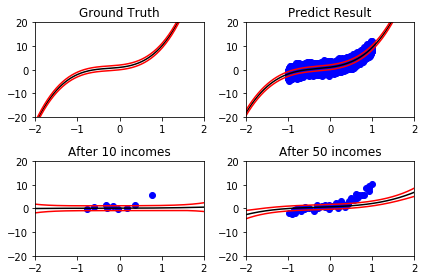

In [11]:
x=np.linspace(-2,2,500)
visualize(x, mean_record, variance_record, w)